In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#GAN Code

In [50]:
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.img_channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.img_channels)
        self.latent_dim = 100
        optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', metrics=['accuracy'])
        self.generator = self.build_generator()
        z = tf.keras.Input(shape=(self.latent_dim,))
        fake_img = self.generator(z)
        self.discriminator.trainable = False
        validity = self.discriminator(fake_img)
        self.combined = tf.keras.Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer = optimizer)
    
    def build_generator(self):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(256, input_dim=self.latent_dim))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(512))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(1024))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(tf.keras.layers.Reshape(self.img_shape))
        noise = tf.keras.Input(shape=(self.latent_dim,))
        img = model(noise)
        return(tf.keras.Model(noise, img))
    
    def build_discriminator(self):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=self.img_shape))
        model.add(tf.keras.layers.Dense(512))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.Dense(256))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        img = tf.keras.Input(shape=self.img_shape)
        validity = model(img)
        return(tf.keras.Model(img, validity))
    
    def train(self, epochs, batch_size = 128, sample_interval = 50):
        (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
        x_train = (x_train/127.5)-1
        x_train = np.expand_dims(x_train, axis=3)
        valid = np.ones((batch_size,1))
        fake = np.zeros((batch_size,1))
        for epoch in range(epochs):
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)
            print("Epoch: " + str(epoch) + "disc loss: " + str(d_loss) + "gen_loss: "+ str(g_loss))
            if epoch % sample_interval == 0 or epoch == 9999:
                self.sample_images(epoch)
    
    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()

In [51]:
gan = GAN()

In [52]:
gan.train(epochs = 10000, batch_size = 132, sample_interval = 10000)

Epoch: 0disc loss: [0.88668406 0.27651516]gen_loss: 0.8913211226463318
Epoch: 1disc loss: [0.09348831 1.        ]gen_loss: 1.215781331062317
Epoch: 2disc loss: [0.1170549  0.99621212]gen_loss: 1.7044974565505981
Epoch: 3disc loss: [0.12769847 0.98863637]gen_loss: 2.6312618255615234
Epoch: 4disc loss: [0.08600588 1.        ]gen_loss: 3.3859071731567383
Epoch: 5disc loss: [0.0374848 1.       ]gen_loss: 3.8869216442108154
Epoch: 6disc loss: [0.01853061 1.        ]gen_loss: 4.169034004211426
Epoch: 7disc loss: [0.01406535 1.        ]gen_loss: 4.344154357910156
Epoch: 8disc loss: [0.0092691 1.       ]gen_loss: 4.6212592124938965
Epoch: 9disc loss: [0.00867441 1.        ]gen_loss: 4.777689456939697
Epoch: 10disc loss: [0.00786105 1.        ]gen_loss: 4.882306098937988
Epoch: 11disc loss: [0.00645956 1.        ]gen_loss: 5.071745872497559
Epoch: 12disc loss: [0.00654806 1.        ]gen_loss: 5.4303879737854
Epoch: 13disc loss: [0.00660624 1.        ]gen_loss: 5.512439727783203
Epoch: 14disc lo

Epoch: 109disc loss: [0.01390815 0.99242425]gen_loss: 10.877225875854492
Epoch: 110disc loss: [0.00744435 1.        ]gen_loss: 10.862632751464844
Epoch: 111disc loss: [0.00628723 1.        ]gen_loss: 11.126681327819824
Epoch: 112disc loss: [0.00939758 0.99621212]gen_loss: 11.372803688049316
Epoch: 113disc loss: [0.00412044 1.        ]gen_loss: 11.099860191345215
Epoch: 114disc loss: [0.00792936 0.99621212]gen_loss: 11.687460899353027
Epoch: 115disc loss: [0.00209563 1.        ]gen_loss: 11.334851264953613
Epoch: 116disc loss: [0.00238641 1.        ]gen_loss: 11.316268920898438
Epoch: 117disc loss: [0.01001976 0.99621212]gen_loss: 11.755208015441895
Epoch: 118disc loss: [0.00457897 1.        ]gen_loss: 11.749704360961914
Epoch: 119disc loss: [0.00577062 1.        ]gen_loss: 11.454208374023438
Epoch: 120disc loss: [0.00128431 1.        ]gen_loss: 11.043939590454102
Epoch: 121disc loss: [0.00131723 1.        ]gen_loss: 11.215611457824707
Epoch: 122disc loss: [0.00113778 1.        ]gen_los

Epoch: 224disc loss: [0.75926729 0.60606061]gen_loss: 5.459636688232422
Epoch: 225disc loss: [0.12161694 0.9848485 ]gen_loss: 7.334942817687988
Epoch: 226disc loss: [0.2131158  0.93560606]gen_loss: 9.462545394897461
Epoch: 227disc loss: [1.17496146 0.48863636]gen_loss: 1.6698548793792725
Epoch: 228disc loss: [0.26946684 0.8598485 ]gen_loss: 4.986776351928711
Epoch: 229disc loss: [0.48068547 0.74242425]gen_loss: 6.258063316345215
Epoch: 230disc loss: [0.18294789 0.97727272]gen_loss: 7.604650974273682
Epoch: 231disc loss: [0.4593913  0.73863637]gen_loss: 7.07370662689209
Epoch: 232disc loss: [0.26998474 0.92045456]gen_loss: 9.574295043945312
Epoch: 233disc loss: [1.33238974 0.39015151]gen_loss: 0.890001118183136
Epoch: 234disc loss: [0.4021312  0.69318181]gen_loss: 2.4692578315734863
Epoch: 235disc loss: [0.47853003 0.76136363]gen_loss: 2.894484281539917
Epoch: 236disc loss: [0.25538433 0.93181819]gen_loss: 5.1280059814453125
Epoch: 237disc loss: [0.70004883 0.59090909]gen_loss: 3.024308

Epoch: 339disc loss: [0.65032858 0.52651515]gen_loss: 1.2826266288757324
Epoch: 340disc loss: [0.67065401 0.51893939]gen_loss: 1.0999943017959595
Epoch: 341disc loss: [0.47989678 0.69318181]gen_loss: 2.242309808731079
Epoch: 342disc loss: [0.60966742 0.58712122]gen_loss: 1.714091420173645
Epoch: 343disc loss: [0.77467239 0.34848485]gen_loss: 1.0926882028579712
Epoch: 344disc loss: [0.4963292  0.64393939]gen_loss: 1.721456527709961
Epoch: 345disc loss: [0.55292083 0.67045453]gen_loss: 3.108994483947754
Epoch: 346disc loss: [0.94515917 0.16666667]gen_loss: 1.5538796186447144
Epoch: 347disc loss: [0.86822444 0.34469697]gen_loss: 0.7495450973510742
Epoch: 348disc loss: [0.50629623 0.56060606]gen_loss: 1.0497885942459106
Epoch: 349disc loss: [0.59382568 0.56818182]gen_loss: 1.0357184410095215
Epoch: 350disc loss: [0.53130303 0.65909091]gen_loss: 1.249746322631836
Epoch: 351disc loss: [0.57999581 0.61363637]gen_loss: 1.3516240119934082
Epoch: 352disc loss: [0.53345712 0.68560608]gen_loss: 1.

Epoch: 453disc loss: [0.49650322 0.73484848]gen_loss: 1.3261371850967407
Epoch: 454disc loss: [0.46475762 0.76893941]gen_loss: 1.49325692653656
Epoch: 455disc loss: [0.48449914 0.77651516]gen_loss: 2.688201904296875
Epoch: 456disc loss: [0.70806012 0.63636364]gen_loss: 1.8497979640960693
Epoch: 457disc loss: [1.02465826 0.14772728]gen_loss: 0.9274007678031921
Epoch: 458disc loss: [0.52843375 0.64393939]gen_loss: 1.092195987701416
Epoch: 459disc loss: [0.55762224 0.64772728]gen_loss: 1.0878311395645142
Epoch: 460disc loss: [0.53934257 0.70833334]gen_loss: 1.190018653869629
Epoch: 461disc loss: [0.49378651 0.79545456]gen_loss: 1.506996512413025
Epoch: 462disc loss: [0.53243433 0.70454545]gen_loss: 1.3263729810714722
Epoch: 463disc loss: [0.55961087 0.65151516]gen_loss: 1.3652172088623047
Epoch: 464disc loss: [0.44200749 0.82954547]gen_loss: 2.2247157096862793
Epoch: 465disc loss: [0.56231585 0.71212122]gen_loss: 1.464308261871338
Epoch: 466disc loss: [0.78322208 0.36742425]gen_loss: 1.13

Epoch: 566disc loss: [0.51723285 0.73863637]gen_loss: 1.350274920463562
Epoch: 567disc loss: [0.48477824 0.78409094]gen_loss: 1.371874213218689
Epoch: 568disc loss: [0.49203609 0.78409091]gen_loss: 1.537222146987915
Epoch: 569disc loss: [0.49880956 0.78787878]gen_loss: 1.4675835371017456
Epoch: 570disc loss: [0.51959679 0.72727275]gen_loss: 1.8656898736953735
Epoch: 571disc loss: [0.60448429 0.67803031]gen_loss: 1.6253058910369873
Epoch: 572disc loss: [0.72319436 0.45454547]gen_loss: 1.2347440719604492
Epoch: 573disc loss: [0.50129475 0.77272728]gen_loss: 1.782522201538086
Epoch: 574disc loss: [0.52544817 0.75      ]gen_loss: 1.599976897239685
Epoch: 575disc loss: [0.51749727 0.75378788]gen_loss: 1.5903459787368774
Epoch: 576disc loss: [0.43046048 0.84848487]gen_loss: 2.4582676887512207
Epoch: 577disc loss: [0.57131533 0.79545456]gen_loss: 1.7366597652435303
Epoch: 578disc loss: [0.80043897 0.35984848]gen_loss: 1.4005541801452637
Epoch: 579disc loss: [0.50849721 0.79924244]gen_loss: 1.

Epoch: 680disc loss: [0.37844518 0.85227275]gen_loss: 2.586062431335449
Epoch: 681disc loss: [0.49990943 0.76893941]gen_loss: 2.0577659606933594
Epoch: 682disc loss: [0.89656556 0.37121212]gen_loss: 1.4906010627746582
Epoch: 683disc loss: [0.4622022 0.75     ]gen_loss: 1.634326457977295
Epoch: 684disc loss: [0.49423036 0.76893941]gen_loss: 1.9347001314163208
Epoch: 685disc loss: [0.50420278 0.78409091]gen_loss: 1.8418903350830078
Epoch: 686disc loss: [0.49614398 0.73106059]gen_loss: 1.7151135206222534
Epoch: 687disc loss: [0.3518445  0.89393941]gen_loss: 1.9242891073226929
Epoch: 688disc loss: [0.40911907 0.875     ]gen_loss: 1.9350557327270508
Epoch: 689disc loss: [0.44653246 0.82575756]gen_loss: 2.1860172748565674
Epoch: 690disc loss: [0.55900998 0.71969697]gen_loss: 2.5314509868621826
Epoch: 691disc loss: [0.84622693 0.47348484]gen_loss: 2.093545436859131
Epoch: 692disc loss: [0.72654948 0.51515153]gen_loss: 1.8253538608551025
Epoch: 693disc loss: [0.51911815 0.74242425]gen_loss: 1.

Epoch: 794disc loss: [0.41306187 0.83712122]gen_loss: 1.967637538909912
Epoch: 795disc loss: [0.37946211 0.85227272]gen_loss: 2.000749349594116
Epoch: 796disc loss: [0.36149281 0.875     ]gen_loss: 2.130398750305176
Epoch: 797disc loss: [0.40557232 0.85227275]gen_loss: 2.060407876968384
Epoch: 798disc loss: [0.45667148 0.81818184]gen_loss: 1.9863947629928589
Epoch: 799disc loss: [0.43990123 0.80681819]gen_loss: 2.4840505123138428
Epoch: 800disc loss: [0.54749887 0.73106062]gen_loss: 3.5830814838409424
Epoch: 801disc loss: [0.99608922 0.5871212 ]gen_loss: 2.6359357833862305
Epoch: 802disc loss: [0.86274683 0.48863637]gen_loss: 1.6175477504730225
Epoch: 803disc loss: [0.53343835 0.71590909]gen_loss: 1.753143072128296
Epoch: 804disc loss: [0.42621483 0.81060606]gen_loss: 2.0381999015808105
Epoch: 805disc loss: [0.36317368 0.87878788]gen_loss: 1.9331293106079102
Epoch: 806disc loss: [0.35810377 0.875     ]gen_loss: 2.2498021125793457
Epoch: 807disc loss: [0.38279684 0.85984847]gen_loss: 2.

Epoch: 907disc loss: [0.67221054 0.66287878]gen_loss: 3.2201972007751465
Epoch: 908disc loss: [0.82895562 0.57575759]gen_loss: 2.9456615447998047
Epoch: 909disc loss: [0.61990008 0.70075759]gen_loss: 2.0479536056518555
Epoch: 910disc loss: [0.48287596 0.75      ]gen_loss: 2.129595994949341
Epoch: 911disc loss: [0.40431188 0.82954544]gen_loss: 2.198547840118408
Epoch: 912disc loss: [0.3056961  0.90530303]gen_loss: 2.0488312244415283
Epoch: 913disc loss: [0.30871908 0.88257575]gen_loss: 2.7700867652893066
Epoch: 914disc loss: [0.40470299 0.82954547]gen_loss: 2.445453643798828
Epoch: 915disc loss: [0.65902257 0.66666666]gen_loss: 2.766786575317383
Epoch: 916disc loss: [0.67221051 0.67424244]gen_loss: 3.2823572158813477
Epoch: 917disc loss: [1.1405974 0.4469697]gen_loss: 2.313937187194824
Epoch: 918disc loss: [0.65668669 0.59090908]gen_loss: 2.2986395359039307
Epoch: 919disc loss: [0.48336221 0.79166669]gen_loss: 2.1194820404052734
Epoch: 920disc loss: [0.37533788 0.83712119]gen_loss: 2.17

Epoch: 1021disc loss: [1.03690302 0.53787878]gen_loss: 3.2295076847076416
Epoch: 1022disc loss: [0.92872101 0.4848485 ]gen_loss: 2.171870708465576
Epoch: 1023disc loss: [0.38858499 0.85606062]gen_loss: 2.078396797180176
Epoch: 1024disc loss: [0.34867522 0.86742425]gen_loss: 2.243201971054077
Epoch: 1025disc loss: [0.38931768 0.84469697]gen_loss: 2.082690715789795
Epoch: 1026disc loss: [0.34469062 0.84848487]gen_loss: 2.4810235500335693
Epoch: 1027disc loss: [0.38003793 0.82196969]gen_loss: 2.421581268310547
Epoch: 1028disc loss: [0.55879566 0.7348485 ]gen_loss: 2.202881336212158
Epoch: 1029disc loss: [0.42608185 0.79924244]gen_loss: 2.489863872528076
Epoch: 1030disc loss: [0.61224321 0.68560606]gen_loss: 2.6224498748779297
Epoch: 1031disc loss: [0.44442688 0.80303028]gen_loss: 2.575610399246216
Epoch: 1032disc loss: [0.48352933 0.77651513]gen_loss: 2.6010801792144775
Epoch: 1033disc loss: [0.43263237 0.78787878]gen_loss: 2.743114948272705
Epoch: 1034disc loss: [0.43659274 0.80303028]ge

Epoch: 1135disc loss: [0.52385288 0.75      ]gen_loss: 2.957247257232666
Epoch: 1136disc loss: [0.57553659 0.73106059]gen_loss: 3.540519952774048
Epoch: 1137disc loss: [0.81571361 0.6098485 ]gen_loss: 2.6744911670684814
Epoch: 1138disc loss: [0.60864499 0.68560606]gen_loss: 2.3962159156799316
Epoch: 1139disc loss: [0.58170292 0.70833334]gen_loss: 2.3374829292297363
Epoch: 1140disc loss: [0.49626815 0.77272728]gen_loss: 2.550757646560669
Epoch: 1141disc loss: [0.4496005  0.81439394]gen_loss: 2.325373888015747
Epoch: 1142disc loss: [0.4968539  0.72727272]gen_loss: 2.4178149700164795
Epoch: 1143disc loss: [0.49696335 0.73863637]gen_loss: 2.695829153060913
Epoch: 1144disc loss: [0.61383718 0.77272728]gen_loss: 3.057185173034668
Epoch: 1145disc loss: [0.7628122  0.63636366]gen_loss: 2.292942523956299
Epoch: 1146disc loss: [0.43015985 0.82196972]gen_loss: 2.3521907329559326
Epoch: 1147disc loss: [0.39956899 0.81818184]gen_loss: 2.5004708766937256
Epoch: 1148disc loss: [0.38672143 0.84469697]

Epoch: 1249disc loss: [0.36356212 0.84469697]gen_loss: 2.5205230712890625
Epoch: 1250disc loss: [0.42197831 0.79166669]gen_loss: 2.4646871089935303
Epoch: 1251disc loss: [0.47139303 0.75757578]gen_loss: 2.407113552093506
Epoch: 1252disc loss: [0.49109408 0.7651515 ]gen_loss: 2.8124282360076904
Epoch: 1253disc loss: [0.49191672 0.75378788]gen_loss: 2.542029857635498
Epoch: 1254disc loss: [0.44087082 0.78030303]gen_loss: 2.6110804080963135
Epoch: 1255disc loss: [0.46343698 0.79166666]gen_loss: 2.5154826641082764
Epoch: 1256disc loss: [0.44934672 0.81439394]gen_loss: 2.814910888671875
Epoch: 1257disc loss: [0.70539093 0.62878788]gen_loss: 2.908926486968994
Epoch: 1258disc loss: [0.86768559 0.59848484]gen_loss: 2.88565731048584
Epoch: 1259disc loss: [1.1230737  0.51515152]gen_loss: 2.5952398777008057
Epoch: 1260disc loss: [0.55749303 0.71590909]gen_loss: 2.3776445388793945
Epoch: 1261disc loss: [0.39751478 0.85606062]gen_loss: 2.2372207641601562
Epoch: 1262disc loss: [0.41594923 0.77651516

Epoch: 1363disc loss: [0.60837781 0.68560606]gen_loss: 2.514666795730591
Epoch: 1364disc loss: [0.6204226  0.71212122]gen_loss: 2.495060682296753
Epoch: 1365disc loss: [0.48809783 0.78409091]gen_loss: 2.44586443901062
Epoch: 1366disc loss: [0.43458648 0.81060606]gen_loss: 2.302349328994751
Epoch: 1367disc loss: [0.48592396 0.77272725]gen_loss: 2.488516092300415
Epoch: 1368disc loss: [0.74939686 0.60227272]gen_loss: 2.766000986099243
Epoch: 1369disc loss: [0.68133745 0.64772725]gen_loss: 2.667368173599243
Epoch: 1370disc loss: [0.6445739  0.66666669]gen_loss: 2.5683324337005615
Epoch: 1371disc loss: [0.52024323 0.76136363]gen_loss: 2.474480152130127
Epoch: 1372disc loss: [0.40571007 0.80303028]gen_loss: 2.4158058166503906
Epoch: 1373disc loss: [0.50440803 0.75      ]gen_loss: 2.4203755855560303
Epoch: 1374disc loss: [0.52472574 0.7651515 ]gen_loss: 2.664013147354126
Epoch: 1375disc loss: [0.56805    0.70833334]gen_loss: 2.6404263973236084
Epoch: 1376disc loss: [0.61682278 0.68560606]gen

Epoch: 1477disc loss: [0.50551327 0.77651516]gen_loss: 2.2759735584259033
Epoch: 1478disc loss: [0.58847898 0.70833334]gen_loss: 2.566234827041626
Epoch: 1479disc loss: [0.6175743  0.69318181]gen_loss: 2.4360883235931396
Epoch: 1480disc loss: [0.59879032 0.68939397]gen_loss: 2.47955584526062
Epoch: 1481disc loss: [0.5985693  0.69696972]gen_loss: 2.3205559253692627
Epoch: 1482disc loss: [0.5532968  0.72727275]gen_loss: 2.7970337867736816
Epoch: 1483disc loss: [0.59929103 0.71590909]gen_loss: 2.319230556488037
Epoch: 1484disc loss: [0.56714728 0.70833334]gen_loss: 2.0914299488067627
Epoch: 1485disc loss: [0.5483904  0.73484847]gen_loss: 2.412100076675415
Epoch: 1486disc loss: [0.56072754 0.74621212]gen_loss: 2.480325222015381
Epoch: 1487disc loss: [0.63589597 0.67803031]gen_loss: 2.4162542819976807
Epoch: 1488disc loss: [0.61008856 0.68560606]gen_loss: 2.2925381660461426
Epoch: 1489disc loss: [0.55114152 0.73484847]gen_loss: 2.314476728439331
Epoch: 1490disc loss: [0.43005569 0.79924241]

Epoch: 1591disc loss: [0.46211341 0.78030303]gen_loss: 2.0586657524108887
Epoch: 1592disc loss: [0.5183737  0.74242425]gen_loss: 2.350186824798584
Epoch: 1593disc loss: [0.54916027 0.73106062]gen_loss: 2.3112165927886963
Epoch: 1594disc loss: [0.59224096 0.71212122]gen_loss: 2.757107973098755
Epoch: 1595disc loss: [0.72766778 0.67045453]gen_loss: 3.5985774993896484
Epoch: 1596disc loss: [0.99093989 0.51893941]gen_loss: 2.321545124053955
Epoch: 1597disc loss: [0.57238585 0.70454544]gen_loss: 2.2943227291107178
Epoch: 1598disc loss: [0.52664948 0.75757575]gen_loss: 2.191439390182495
Epoch: 1599disc loss: [0.46030806 0.74242422]gen_loss: 2.095994234085083
Epoch: 1600disc loss: [0.44553927 0.81060606]gen_loss: 2.12276554107666
Epoch: 1601disc loss: [0.61769044 0.70833334]gen_loss: 2.170703411102295
Epoch: 1602disc loss: [0.55491772 0.75757575]gen_loss: 2.5350143909454346
Epoch: 1603disc loss: [0.71500435 0.63257575]gen_loss: 2.7581968307495117
Epoch: 1604disc loss: [0.71109152 0.65909094]g

Epoch: 1705disc loss: [0.56417844 0.74621212]gen_loss: 2.158289670944214
Epoch: 1706disc loss: [0.52986543 0.75378788]gen_loss: 2.372608184814453
Epoch: 1707disc loss: [0.54699716 0.71590909]gen_loss: 2.2724416255950928
Epoch: 1708disc loss: [0.64230603 0.69318181]gen_loss: 2.0371387004852295
Epoch: 1709disc loss: [0.66899785 0.65151516]gen_loss: 2.401844024658203
Epoch: 1710disc loss: [0.58458576 0.70454544]gen_loss: 2.253382444381714
Epoch: 1711disc loss: [0.51687872 0.75757575]gen_loss: 2.4141318798065186
Epoch: 1712disc loss: [0.5241304  0.73106059]gen_loss: 2.1893842220306396
Epoch: 1713disc loss: [0.53259967 0.73106059]gen_loss: 2.329568386077881
Epoch: 1714disc loss: [0.46542838 0.78409091]gen_loss: 2.5081534385681152
Epoch: 1715disc loss: [0.59241158 0.7348485 ]gen_loss: 2.3025307655334473
Epoch: 1716disc loss: [0.58776006 0.67803031]gen_loss: 2.3253872394561768
Epoch: 1717disc loss: [0.59366889 0.70454544]gen_loss: 2.230026960372925
Epoch: 1718disc loss: [0.57711706 0.73863637

Epoch: 1819disc loss: [0.51076676 0.74242425]gen_loss: 2.2411108016967773
Epoch: 1820disc loss: [0.62314799 0.73863637]gen_loss: 2.41690731048584
Epoch: 1821disc loss: [0.68144271 0.68181816]gen_loss: 2.1371424198150635
Epoch: 1822disc loss: [0.54018974 0.71212122]gen_loss: 2.140570640563965
Epoch: 1823disc loss: [0.48438773 0.74242425]gen_loss: 2.1734371185302734
Epoch: 1824disc loss: [0.58872235 0.70833331]gen_loss: 1.9932748079299927
Epoch: 1825disc loss: [0.59547572 0.68560606]gen_loss: 2.1679935455322266
Epoch: 1826disc loss: [0.60459879 0.68560606]gen_loss: 2.5294113159179688
Epoch: 1827disc loss: [0.65194228 0.65909091]gen_loss: 2.7826004028320312
Epoch: 1828disc loss: [0.9367106  0.49242425]gen_loss: 2.32832407951355
Epoch: 1829disc loss: [0.63215089 0.71590909]gen_loss: 2.092972755432129
Epoch: 1830disc loss: [0.60734108 0.70075756]gen_loss: 2.0348432064056396
Epoch: 1831disc loss: [0.62073123 0.67803028]gen_loss: 2.121053695678711
Epoch: 1832disc loss: [0.59943941 0.68181819]

Epoch: 1931disc loss: [0.57760999 0.70833334]gen_loss: 2.189154624938965
Epoch: 1932disc loss: [0.54755852 0.70075759]gen_loss: 2.1512293815612793
Epoch: 1933disc loss: [0.56980017 0.71969697]gen_loss: 2.153341293334961
Epoch: 1934disc loss: [0.70194125 0.62121212]gen_loss: 2.112046718597412
Epoch: 1935disc loss: [0.61825058 0.67424241]gen_loss: 2.21372652053833
Epoch: 1936disc loss: [0.58697838 0.71590909]gen_loss: 2.116635322570801
Epoch: 1937disc loss: [0.565505   0.72348487]gen_loss: 2.0288045406341553
Epoch: 1938disc loss: [0.52857172 0.74621212]gen_loss: 2.1628377437591553
Epoch: 1939disc loss: [0.51919782 0.75      ]gen_loss: 2.234870433807373
Epoch: 1940disc loss: [0.52601302 0.71590909]gen_loss: 2.2354323863983154
Epoch: 1941disc loss: [0.50683607 0.76893938]gen_loss: 2.066392183303833
Epoch: 1942disc loss: [0.62163338 0.65151516]gen_loss: 2.5409204959869385
Epoch: 1943disc loss: [0.75887749 0.65909091]gen_loss: 2.359666347503662
Epoch: 1944disc loss: [0.92362672 0.47348484]ge

Epoch: 2045disc loss: [0.58282912 0.68939394]gen_loss: 2.0410232543945312
Epoch: 2046disc loss: [0.56239223 0.72727272]gen_loss: 2.416832685470581
Epoch: 2047disc loss: [0.5512282 0.7537879]gen_loss: 2.284916877746582
Epoch: 2048disc loss: [0.69061291 0.625     ]gen_loss: 2.2568156719207764
Epoch: 2049disc loss: [0.54981953 0.7348485 ]gen_loss: 2.144620656967163
Epoch: 2050disc loss: [0.63754779 0.68181819]gen_loss: 2.0113675594329834
Epoch: 2051disc loss: [0.64526254 0.68181816]gen_loss: 2.271591901779175
Epoch: 2052disc loss: [0.69107038 0.64393938]gen_loss: 2.0959620475769043
Epoch: 2053disc loss: [0.64258003 0.6401515 ]gen_loss: 2.112560749053955
Epoch: 2054disc loss: [0.64732474 0.68181816]gen_loss: 2.080003023147583
Epoch: 2055disc loss: [0.66867018 0.625     ]gen_loss: 2.0162527561187744
Epoch: 2056disc loss: [0.56555808 0.70454547]gen_loss: 2.108077049255371
Epoch: 2057disc loss: [0.61294141 0.65909091]gen_loss: 2.3072612285614014
Epoch: 2058disc loss: [0.51337722 0.74621212]ge

Epoch: 2159disc loss: [0.59139299 0.67803028]gen_loss: 1.9952205419540405
Epoch: 2160disc loss: [0.51896718 0.71212119]gen_loss: 1.951717734336853
Epoch: 2161disc loss: [0.6734609  0.65530303]gen_loss: 2.3651163578033447
Epoch: 2162disc loss: [0.66118768 0.625     ]gen_loss: 2.119563579559326
Epoch: 2163disc loss: [0.57443187 0.68939394]gen_loss: 1.9698385000228882
Epoch: 2164disc loss: [0.62031123 0.64772728]gen_loss: 1.8559513092041016
Epoch: 2165disc loss: [0.52257346 0.72727275]gen_loss: 2.1313819885253906
Epoch: 2166disc loss: [0.61764067 0.64772728]gen_loss: 2.0619029998779297
Epoch: 2167disc loss: [0.62626126 0.67045456]gen_loss: 1.904128909111023
Epoch: 2168disc loss: [0.57538888 0.70833334]gen_loss: 2.0313642024993896
Epoch: 2169disc loss: [0.6413396  0.65151516]gen_loss: 1.9128166437149048
Epoch: 2170disc loss: [0.62510538 0.69696972]gen_loss: 1.9940037727355957
Epoch: 2171disc loss: [0.64487928 0.66666666]gen_loss: 2.0498478412628174
Epoch: 2172disc loss: [0.58951145 0.68939

Epoch: 2273disc loss: [0.53922264 0.70075759]gen_loss: 1.7395918369293213
Epoch: 2274disc loss: [0.52912207 0.76136363]gen_loss: 1.9636808633804321
Epoch: 2275disc loss: [0.56205049 0.70075759]gen_loss: 1.9836982488632202
Epoch: 2276disc loss: [0.7369923  0.63257578]gen_loss: 2.140695333480835
Epoch: 2277disc loss: [0.83182034 0.54924242]gen_loss: 2.0223748683929443
Epoch: 2278disc loss: [0.77601781 0.58712122]gen_loss: 1.9144607782363892
Epoch: 2279disc loss: [0.59912893 0.68560606]gen_loss: 1.8981081247329712
Epoch: 2280disc loss: [0.47867997 0.76893941]gen_loss: 1.9134310483932495
Epoch: 2281disc loss: [0.53377244 0.71590909]gen_loss: 1.9665663242340088
Epoch: 2282disc loss: [0.55692676 0.72348484]gen_loss: 1.8702502250671387
Epoch: 2283disc loss: [0.61619857 0.65909091]gen_loss: 2.0555193424224854
Epoch: 2284disc loss: [0.52437359 0.71969697]gen_loss: 1.8656384944915771
Epoch: 2285disc loss: [0.57967128 0.70075756]gen_loss: 2.4688775539398193
Epoch: 2286disc loss: [0.9129138  0.534

Epoch: 2387disc loss: [0.50655736 0.72348484]gen_loss: 1.8362293243408203
Epoch: 2388disc loss: [0.66296101 0.6401515 ]gen_loss: 1.9793987274169922
Epoch: 2389disc loss: [0.67542678 0.64393938]gen_loss: 1.9191609621047974
Epoch: 2390disc loss: [0.63279885 0.65909091]gen_loss: 1.8259867429733276
Epoch: 2391disc loss: [0.57093084 0.67045453]gen_loss: 1.8745274543762207
Epoch: 2392disc loss: [0.53418578 0.69318181]gen_loss: 1.9678782224655151
Epoch: 2393disc loss: [0.63231578 0.63636366]gen_loss: 1.844042420387268
Epoch: 2394disc loss: [0.55202851 0.70833331]gen_loss: 2.1021640300750732
Epoch: 2395disc loss: [0.55758977 0.70075759]gen_loss: 1.8068227767944336
Epoch: 2396disc loss: [0.62833321 0.65530303]gen_loss: 1.9750787019729614
Epoch: 2397disc loss: [0.55447274 0.70833334]gen_loss: 1.9903684854507446
Epoch: 2398disc loss: [0.67969185 0.62878788]gen_loss: 1.7948400974273682
Epoch: 2399disc loss: [0.67780373 0.65909094]gen_loss: 1.9348297119140625
Epoch: 2400disc loss: [0.67771316 0.670

Epoch: 2501disc loss: [0.58908425 0.69318181]gen_loss: 1.9941158294677734
Epoch: 2502disc loss: [0.62630543 0.66666666]gen_loss: 1.8926140069961548
Epoch: 2503disc loss: [0.68117583 0.62121212]gen_loss: 1.8104664087295532
Epoch: 2504disc loss: [0.61799011 0.67045453]gen_loss: 1.8313459157943726
Epoch: 2505disc loss: [0.52078077 0.73106062]gen_loss: 1.9256504774093628
Epoch: 2506disc loss: [0.68122485 0.6098485 ]gen_loss: 1.794061541557312
Epoch: 2507disc loss: [0.6953153  0.64772728]gen_loss: 1.9897525310516357
Epoch: 2508disc loss: [0.68815887 0.64393938]gen_loss: 1.7142494916915894
Epoch: 2509disc loss: [0.57235435 0.68939394]gen_loss: 1.9201210737228394
Epoch: 2510disc loss: [0.67578876 0.62878788]gen_loss: 2.1221728324890137
Epoch: 2511disc loss: [0.80092776 0.50000001]gen_loss: 1.5989205837249756
Epoch: 2512disc loss: [0.62607515 0.62121212]gen_loss: 1.67466402053833
Epoch: 2513disc loss: [0.55774161 0.69318181]gen_loss: 1.9046030044555664
Epoch: 2514disc loss: [0.54347908 0.73106

Epoch: 2615disc loss: [0.58518094 0.66666666]gen_loss: 1.7788609266281128
Epoch: 2616disc loss: [0.61961752 0.625     ]gen_loss: 1.7011545896530151
Epoch: 2617disc loss: [0.56218132 0.68181819]gen_loss: 1.792514443397522
Epoch: 2618disc loss: [0.63194384 0.60606059]gen_loss: 1.9366464614868164
Epoch: 2619disc loss: [0.66735557 0.64393941]gen_loss: 1.9124618768692017
Epoch: 2620disc loss: [0.52768129 0.71212122]gen_loss: 1.668237328529358
Epoch: 2621disc loss: [0.55821806 0.68560606]gen_loss: 1.762529969215393
Epoch: 2622disc loss: [0.58319777 0.73106062]gen_loss: 1.9222939014434814
Epoch: 2623disc loss: [0.67144954 0.6401515 ]gen_loss: 1.9556611776351929
Epoch: 2624disc loss: [0.52307051 0.73863637]gen_loss: 1.676572561264038
Epoch: 2625disc loss: [0.53418887 0.67803031]gen_loss: 1.6801447868347168
Epoch: 2626disc loss: [0.56062517 0.70075759]gen_loss: 1.765688180923462
Epoch: 2627disc loss: [0.62242651 0.67424241]gen_loss: 1.9095005989074707
Epoch: 2628disc loss: [0.63594568 0.6780303

Epoch: 2728disc loss: [0.69289199 0.59469697]gen_loss: 1.758347511291504
Epoch: 2729disc loss: [0.59757277 0.63257578]gen_loss: 1.7589733600616455
Epoch: 2730disc loss: [0.61300784 0.65151516]gen_loss: 1.6953625679016113
Epoch: 2731disc loss: [0.63832337 0.64772728]gen_loss: 1.7943718433380127
Epoch: 2732disc loss: [0.59960082 0.66287881]gen_loss: 1.7329453229904175
Epoch: 2733disc loss: [0.5887287  0.70075756]gen_loss: 1.8983033895492554
Epoch: 2734disc loss: [0.62005475 0.67424241]gen_loss: 1.6505132913589478
Epoch: 2735disc loss: [0.6195696  0.64393941]gen_loss: 1.7502164840698242
Epoch: 2736disc loss: [0.60267401 0.71212122]gen_loss: 1.8147871494293213
Epoch: 2737disc loss: [0.61655021 0.67045456]gen_loss: 1.9128884077072144
Epoch: 2738disc loss: [0.56365627 0.70833334]gen_loss: 1.8503438234329224
Epoch: 2739disc loss: [0.57182541 0.70075759]gen_loss: 1.7116388082504272
Epoch: 2740disc loss: [0.72803283 0.57196969]gen_loss: 1.9750678539276123
Epoch: 2741disc loss: [0.67986891 0.632

Epoch: 2842disc loss: [0.64760238 0.625     ]gen_loss: 1.7167057991027832
Epoch: 2843disc loss: [0.59266645 0.66666669]gen_loss: 1.640637993812561
Epoch: 2844disc loss: [0.59064558 0.72348487]gen_loss: 1.7547670602798462
Epoch: 2845disc loss: [0.61275208 0.64772728]gen_loss: 1.7562514543533325
Epoch: 2846disc loss: [0.65552714 0.64772728]gen_loss: 1.8214101791381836
Epoch: 2847disc loss: [0.618956   0.66666666]gen_loss: 1.9301382303237915
Epoch: 2848disc loss: [0.77759916 0.5530303 ]gen_loss: 1.6237457990646362
Epoch: 2849disc loss: [0.64763543 0.66287878]gen_loss: 1.6287786960601807
Epoch: 2850disc loss: [0.62612078 0.70454547]gen_loss: 1.9170604944229126
Epoch: 2851disc loss: [0.73558274 0.56060606]gen_loss: 1.950758695602417
Epoch: 2852disc loss: [0.61311376 0.68560603]gen_loss: 1.9788966178894043
Epoch: 2853disc loss: [0.77276918 0.5530303 ]gen_loss: 1.466434121131897
Epoch: 2854disc loss: [0.6178064  0.65530303]gen_loss: 1.7167887687683105
Epoch: 2855disc loss: [0.53667794 0.75378

Epoch: 2956disc loss: [0.66568828 0.61363637]gen_loss: 1.6283330917358398
Epoch: 2957disc loss: [0.53353131 0.70075756]gen_loss: 1.6018558740615845
Epoch: 2958disc loss: [0.62573525 0.65909091]gen_loss: 1.6368114948272705
Epoch: 2959disc loss: [0.61734983 0.64772728]gen_loss: 1.8386012315750122
Epoch: 2960disc loss: [0.69647503 0.62878788]gen_loss: 1.896296501159668
Epoch: 2961disc loss: [0.76717794 0.55681819]gen_loss: 1.5555617809295654
Epoch: 2962disc loss: [0.61055017 0.66666666]gen_loss: 1.5323517322540283
Epoch: 2963disc loss: [0.58936647 0.65151516]gen_loss: 1.736364722251892
Epoch: 2964disc loss: [0.62555987 0.64772725]gen_loss: 1.5937575101852417
Epoch: 2965disc loss: [0.65396991 0.625     ]gen_loss: 1.6200371980667114
Epoch: 2966disc loss: [0.54141667 0.68560606]gen_loss: 1.688253402709961
Epoch: 2967disc loss: [0.56205672 0.69318181]gen_loss: 1.7380057573318481
Epoch: 2968disc loss: [0.56382832 0.69318181]gen_loss: 1.6583431959152222
Epoch: 2969disc loss: [0.56844887 0.68939

Epoch: 3068disc loss: [0.63894159 0.63257575]gen_loss: 1.7645378112792969
Epoch: 3069disc loss: [0.59170589 0.63636366]gen_loss: 1.6561936140060425
Epoch: 3070disc loss: [0.55246133 0.71590909]gen_loss: 1.7617582082748413
Epoch: 3071disc loss: [0.55806315 0.69318181]gen_loss: 1.6668404340744019
Epoch: 3072disc loss: [0.65066496 0.625     ]gen_loss: 1.9759629964828491
Epoch: 3073disc loss: [0.72088504 0.5871212 ]gen_loss: 1.7244269847869873
Epoch: 3074disc loss: [0.70548767 0.54924241]gen_loss: 1.7269227504730225
Epoch: 3075disc loss: [0.75468922 0.53030303]gen_loss: 1.7022615671157837
Epoch: 3076disc loss: [0.58974345 0.70454547]gen_loss: 1.6947704553604126
Epoch: 3077disc loss: [0.6099351  0.66287881]gen_loss: 1.5809919834136963
Epoch: 3078disc loss: [0.59240112 0.69318181]gen_loss: 1.5584226846694946
Epoch: 3079disc loss: [0.59803578 0.66287878]gen_loss: 1.638008952140808
Epoch: 3080disc loss: [0.60456285 0.64772728]gen_loss: 1.6618698835372925
Epoch: 3081disc loss: [0.50009347 0.746

Epoch: 3182disc loss: [0.60586205 0.66287878]gen_loss: 1.725804328918457
Epoch: 3183disc loss: [0.57878613 0.69318181]gen_loss: 1.7630367279052734
Epoch: 3184disc loss: [0.63461265 0.64393941]gen_loss: 1.6970716714859009
Epoch: 3185disc loss: [0.59839123 0.65909091]gen_loss: 1.4949707984924316
Epoch: 3186disc loss: [0.64457762 0.59469697]gen_loss: 1.5459465980529785
Epoch: 3187disc loss: [0.60676453 0.66287878]gen_loss: 1.637070655822754
Epoch: 3188disc loss: [0.70498595 0.58333334]gen_loss: 1.6521233320236206
Epoch: 3189disc loss: [0.6264239  0.64772725]gen_loss: 1.5303497314453125
Epoch: 3190disc loss: [0.52466698 0.73863637]gen_loss: 1.6022919416427612
Epoch: 3191disc loss: [0.53983565 0.73863637]gen_loss: 1.6714391708374023
Epoch: 3192disc loss: [0.63798493 0.65151516]gen_loss: 1.6835743188858032
Epoch: 3193disc loss: [0.70171016 0.59469697]gen_loss: 1.5507457256317139
Epoch: 3194disc loss: [0.65061885 0.65151516]gen_loss: 1.5995547771453857
Epoch: 3195disc loss: [0.64164594 0.6628

Epoch: 3295disc loss: [0.55838254 0.68939394]gen_loss: 1.5707916021347046
Epoch: 3296disc loss: [0.54928869 0.69696972]gen_loss: 1.694153904914856
Epoch: 3297disc loss: [0.58026862 0.68181819]gen_loss: 1.681968092918396
Epoch: 3298disc loss: [0.58608985 0.67424244]gen_loss: 1.8554341793060303
Epoch: 3299disc loss: [0.67280933 0.64015153]gen_loss: 1.6449401378631592
Epoch: 3300disc loss: [0.61687618 0.64772728]gen_loss: 1.7666683197021484
Epoch: 3301disc loss: [0.73992726 0.59469697]gen_loss: 1.9153183698654175
Epoch: 3302disc loss: [0.82958114 0.5530303 ]gen_loss: 1.6353561878204346
Epoch: 3303disc loss: [0.53137574 0.72348487]gen_loss: 1.5512477159500122
Epoch: 3304disc loss: [0.59881911 0.65151516]gen_loss: 1.505480170249939
Epoch: 3305disc loss: [0.57829344 0.67424241]gen_loss: 1.6217442750930786
Epoch: 3306disc loss: [0.62339771 0.64393938]gen_loss: 1.5046032667160034
Epoch: 3307disc loss: [0.7040396  0.59469697]gen_loss: 1.6775269508361816
Epoch: 3308disc loss: [0.63985893 0.66666

Epoch: 3409disc loss: [0.62446612 0.68181816]gen_loss: 1.5775837898254395
Epoch: 3410disc loss: [0.64811462 0.57575756]gen_loss: 1.7758352756500244
Epoch: 3411disc loss: [0.62100911 0.65151516]gen_loss: 1.5883064270019531
Epoch: 3412disc loss: [0.58634529 0.68181819]gen_loss: 1.5924468040466309
Epoch: 3413disc loss: [0.54559842 0.71590909]gen_loss: 1.6536659002304077
Epoch: 3414disc loss: [0.55149436 0.68560603]gen_loss: 1.5223770141601562
Epoch: 3415disc loss: [0.66092476 0.66666666]gen_loss: 1.549088716506958
Epoch: 3416disc loss: [0.69790962 0.625     ]gen_loss: 1.6326415538787842
Epoch: 3417disc loss: [0.65125722 0.63636363]gen_loss: 1.5777119398117065
Epoch: 3418disc loss: [0.6062521  0.65530303]gen_loss: 1.713057518005371
Epoch: 3419disc loss: [0.63873127 0.63636363]gen_loss: 1.4556715488433838
Epoch: 3420disc loss: [0.58107501 0.71590909]gen_loss: 1.5766141414642334
Epoch: 3421disc loss: [0.56544778 0.68939394]gen_loss: 1.603407621383667
Epoch: 3422disc loss: [0.53747262 0.72727

Epoch: 3523disc loss: [0.57884738 0.72348484]gen_loss: 1.4824585914611816
Epoch: 3524disc loss: [0.60903957 0.63636366]gen_loss: 1.701871395111084
Epoch: 3525disc loss: [0.57554838 0.69696969]gen_loss: 1.6486181020736694
Epoch: 3526disc loss: [0.67032427 0.61742425]gen_loss: 1.5173145532608032
Epoch: 3527disc loss: [0.62871405 0.62121212]gen_loss: 1.5760964155197144
Epoch: 3528disc loss: [0.58532861 0.67803031]gen_loss: 1.4758999347686768
Epoch: 3529disc loss: [0.58228675 0.69318181]gen_loss: 1.5479422807693481
Epoch: 3530disc loss: [0.53160587 0.71969697]gen_loss: 1.607350468635559
Epoch: 3531disc loss: [0.58787628 0.69696969]gen_loss: 1.6203055381774902
Epoch: 3532disc loss: [0.62144136 0.62121212]gen_loss: 1.4727169275283813
Epoch: 3533disc loss: [0.65766624 0.6401515 ]gen_loss: 1.6198574304580688
Epoch: 3534disc loss: [0.71878684 0.58712119]gen_loss: 1.520060420036316
Epoch: 3535disc loss: [0.6398342 0.6401515]gen_loss: 1.4994879961013794
Epoch: 3536disc loss: [0.58130613 0.6856060

Epoch: 3637disc loss: [0.57410416 0.70075756]gen_loss: 1.560530424118042
Epoch: 3638disc loss: [0.58003539 0.67045453]gen_loss: 1.6496661901474
Epoch: 3639disc loss: [0.60426861 0.65530303]gen_loss: 1.739060878753662
Epoch: 3640disc loss: [0.61551738 0.65909091]gen_loss: 1.5531346797943115
Epoch: 3641disc loss: [0.64284027 0.65530303]gen_loss: 1.4711073637008667
Epoch: 3642disc loss: [0.61894768 0.62121212]gen_loss: 1.6137334108352661
Epoch: 3643disc loss: [0.58285603 0.68560606]gen_loss: 1.7129861116409302
Epoch: 3644disc loss: [0.75824112 0.5719697 ]gen_loss: 1.442224383354187
Epoch: 3645disc loss: [0.62004989 0.63257575]gen_loss: 1.462969422340393
Epoch: 3646disc loss: [0.66641781 0.625     ]gen_loss: 1.4792555570602417
Epoch: 3647disc loss: [0.55180341 0.70833334]gen_loss: 1.6101850271224976
Epoch: 3648disc loss: [0.66200662 0.6098485 ]gen_loss: 1.5394283533096313
Epoch: 3649disc loss: [0.59320658 0.70833334]gen_loss: 1.6875250339508057
Epoch: 3650disc loss: [0.68867362 0.56439394]

Epoch: 3751disc loss: [0.69831687 0.59848484]gen_loss: 1.5131381750106812
Epoch: 3752disc loss: [0.60787991 0.64393938]gen_loss: 1.4534257650375366
Epoch: 3753disc loss: [0.59141162 0.68181819]gen_loss: 1.4277448654174805
Epoch: 3754disc loss: [0.55785528 0.69696969]gen_loss: 1.3801591396331787
Epoch: 3755disc loss: [0.58426988 0.64393938]gen_loss: 1.5255409479141235
Epoch: 3756disc loss: [0.5286015  0.73106059]gen_loss: 1.551246166229248
Epoch: 3757disc loss: [0.59914008 0.64772725]gen_loss: 1.6459753513336182
Epoch: 3758disc loss: [0.63547149 0.64393938]gen_loss: 1.7373899221420288
Epoch: 3759disc loss: [0.78696492 0.51136366]gen_loss: 1.5076175928115845
Epoch: 3760disc loss: [0.59264341 0.65530303]gen_loss: 1.37522292137146
Epoch: 3761disc loss: [0.65063938 0.57954544]gen_loss: 1.3491766452789307
Epoch: 3762disc loss: [0.55775006 0.69696972]gen_loss: 1.4870166778564453
Epoch: 3763disc loss: [0.64466584 0.60227272]gen_loss: 1.5349856615066528
Epoch: 3764disc loss: [0.59862077 0.64772

Epoch: 3865disc loss: [0.56775743 0.68560606]gen_loss: 1.5036524534225464
Epoch: 3866disc loss: [0.59133309 0.69696969]gen_loss: 1.5074323415756226
Epoch: 3867disc loss: [0.62881371 0.6401515 ]gen_loss: 1.5017036199569702
Epoch: 3868disc loss: [0.64336333 0.66666666]gen_loss: 1.6410655975341797
Epoch: 3869disc loss: [0.73816571 0.54166667]gen_loss: 1.4523180723190308
Epoch: 3870disc loss: [0.63065478 0.68181819]gen_loss: 1.4254560470581055
Epoch: 3871disc loss: [0.61799788 0.67424244]gen_loss: 1.3467364311218262
Epoch: 3872disc loss: [0.63757381 0.59848484]gen_loss: 1.5047686100006104
Epoch: 3873disc loss: [0.60733896 0.68181819]gen_loss: 1.4985461235046387
Epoch: 3874disc loss: [0.72722673 0.56818181]gen_loss: 1.5393221378326416
Epoch: 3875disc loss: [0.5837225  0.68939394]gen_loss: 1.3572063446044922
Epoch: 3876disc loss: [0.58992338 0.66287878]gen_loss: 1.5815142393112183
Epoch: 3877disc loss: [0.64655763 0.59848484]gen_loss: 1.4675236940383911
Epoch: 3878disc loss: [0.61012295 0.64

Epoch: 3979disc loss: [0.58935243 0.65530303]gen_loss: 1.4345890283584595
Epoch: 3980disc loss: [0.62894514 0.61742425]gen_loss: 1.4330577850341797
Epoch: 3981disc loss: [0.60974234 0.6287879 ]gen_loss: 1.4755988121032715
Epoch: 3982disc loss: [0.63979369 0.65530303]gen_loss: 1.332183837890625
Epoch: 3983disc loss: [0.54199287 0.71590909]gen_loss: 1.4741206169128418
Epoch: 3984disc loss: [0.64402592 0.58333334]gen_loss: 1.4990190267562866
Epoch: 3985disc loss: [0.58448666 0.65530303]gen_loss: 1.6136467456817627
Epoch: 3986disc loss: [0.698652   0.54166667]gen_loss: 1.4457383155822754
Epoch: 3987disc loss: [0.61805737 0.6287879 ]gen_loss: 1.4865972995758057
Epoch: 3988disc loss: [0.60967377 0.66666666]gen_loss: 1.6266541481018066
Epoch: 3989disc loss: [0.68439907 0.6401515 ]gen_loss: 1.4801931381225586
Epoch: 3990disc loss: [0.68334314 0.58333334]gen_loss: 1.3975913524627686
Epoch: 3991disc loss: [0.61586818 0.67803031]gen_loss: 1.3775542974472046
Epoch: 3992disc loss: [0.66885453 0.598

Epoch: 4093disc loss: [0.60684076 0.68181819]gen_loss: 1.4159053564071655
Epoch: 4094disc loss: [0.61860639 0.67424241]gen_loss: 1.4170297384262085
Epoch: 4095disc loss: [0.71498898 0.55681819]gen_loss: 1.5647374391555786
Epoch: 4096disc loss: [0.60439646 0.67045453]gen_loss: 1.3299752473831177
Epoch: 4097disc loss: [0.6055226  0.64772725]gen_loss: 1.4096914529800415
Epoch: 4098disc loss: [0.62567925 0.67803031]gen_loss: 1.5667842626571655
Epoch: 4099disc loss: [0.68946812 0.6098485 ]gen_loss: 1.346375584602356
Epoch: 4100disc loss: [0.6516014  0.64393941]gen_loss: 1.33869206905365
Epoch: 4101disc loss: [0.67086586 0.67045456]gen_loss: 1.3648298978805542
Epoch: 4102disc loss: [0.6113323  0.63636366]gen_loss: 1.2760297060012817
Epoch: 4103disc loss: [0.58064058 0.67803028]gen_loss: 1.43242609500885
Epoch: 4104disc loss: [0.5698984  0.68560606]gen_loss: 1.4049288034439087
Epoch: 4105disc loss: [0.57576123 0.69318181]gen_loss: 1.386117935180664
Epoch: 4106disc loss: [0.55490118 0.73484847

Epoch: 4205disc loss: [0.68018812 0.625     ]gen_loss: 1.3449151515960693
Epoch: 4206disc loss: [0.56078759 0.71590909]gen_loss: 1.3695505857467651
Epoch: 4207disc loss: [0.62206578 0.62121212]gen_loss: 1.3449960947036743
Epoch: 4208disc loss: [0.65220135 0.6098485 ]gen_loss: 1.497165322303772
Epoch: 4209disc loss: [0.72312078 0.58333331]gen_loss: 1.3239881992340088
Epoch: 4210disc loss: [0.6156556  0.64772728]gen_loss: 1.3605929613113403
Epoch: 4211disc loss: [0.59367242 0.71590909]gen_loss: 1.3895984888076782
Epoch: 4212disc loss: [0.60040888 0.59848484]gen_loss: 1.353395938873291
Epoch: 4213disc loss: [0.64364773 0.63636363]gen_loss: 1.3874659538269043
Epoch: 4214disc loss: [0.68221065 0.60227275]gen_loss: 1.3983944654464722
Epoch: 4215disc loss: [0.58050823 0.68560606]gen_loss: 1.4850952625274658
Epoch: 4216disc loss: [0.73762053 0.54166667]gen_loss: 1.4028087854385376
Epoch: 4217disc loss: [0.64357951 0.66666669]gen_loss: 1.41107177734375
Epoch: 4218disc loss: [0.69243595 0.545454

Epoch: 4319disc loss: [0.60618401 0.68560606]gen_loss: 1.3979835510253906
Epoch: 4320disc loss: [0.63915029 0.65530303]gen_loss: 1.4596264362335205
Epoch: 4321disc loss: [0.75632042 0.48863636]gen_loss: 1.5214042663574219
Epoch: 4322disc loss: [0.6873813  0.60606061]gen_loss: 1.3287584781646729
Epoch: 4323disc loss: [0.56825003 0.68181819]gen_loss: 1.2001465559005737
Epoch: 4324disc loss: [0.55793482 0.73106059]gen_loss: 1.4786242246627808
Epoch: 4325disc loss: [0.60346967 0.68560606]gen_loss: 1.379287600517273
Epoch: 4326disc loss: [0.70100302 0.52272727]gen_loss: 1.3757915496826172
Epoch: 4327disc loss: [0.63438913 0.65151516]gen_loss: 1.436328649520874
Epoch: 4328disc loss: [0.63286015 0.65530303]gen_loss: 1.2919611930847168
Epoch: 4329disc loss: [0.5870952  0.65151516]gen_loss: 1.3940843343734741
Epoch: 4330disc loss: [0.63442713 0.64772728]gen_loss: 1.4681291580200195
Epoch: 4331disc loss: [0.66131878 0.58333334]gen_loss: 1.378210425376892
Epoch: 4332disc loss: [0.61079895 0.68560

Epoch: 4433disc loss: [0.60491583 0.67803031]gen_loss: 1.4783035516738892
Epoch: 4434disc loss: [0.66293269 0.61742425]gen_loss: 1.3301033973693848
Epoch: 4435disc loss: [0.62489551 0.65530303]gen_loss: 1.3552563190460205
Epoch: 4436disc loss: [0.65943426 0.57196969]gen_loss: 1.4185047149658203
Epoch: 4437disc loss: [0.60244688 0.6401515 ]gen_loss: 1.3284810781478882
Epoch: 4438disc loss: [0.58819427 0.68181816]gen_loss: 1.3686691522598267
Epoch: 4439disc loss: [0.61733833 0.66287878]gen_loss: 1.426964521408081
Epoch: 4440disc loss: [0.65392992 0.62121212]gen_loss: 1.2526763677597046
Epoch: 4441disc loss: [0.59544107 0.67045456]gen_loss: 1.3650909662246704
Epoch: 4442disc loss: [0.65178528 0.58712122]gen_loss: 1.4165164232254028
Epoch: 4443disc loss: [0.67710227 0.56818183]gen_loss: 1.3962516784667969
Epoch: 4444disc loss: [0.63931692 0.61363637]gen_loss: 1.3399640321731567
Epoch: 4445disc loss: [0.62394097 0.66287878]gen_loss: 1.3653661012649536
Epoch: 4446disc loss: [0.68610618 0.545

Epoch: 4545disc loss: [0.66620618 0.63257575]gen_loss: 1.4292069673538208
Epoch: 4546disc loss: [0.63610175 0.62878788]gen_loss: 1.544382095336914
Epoch: 4547disc loss: [0.73507327 0.51136363]gen_loss: 1.4368046522140503
Epoch: 4548disc loss: [0.60235739 0.68939394]gen_loss: 1.4609938859939575
Epoch: 4549disc loss: [0.5896647  0.68181819]gen_loss: 1.3204412460327148
Epoch: 4550disc loss: [0.59194851 0.68560606]gen_loss: 1.342394471168518
Epoch: 4551disc loss: [0.63839719 0.59848484]gen_loss: 1.3616127967834473
Epoch: 4552disc loss: [0.64024401 0.62878788]gen_loss: 1.4171074628829956
Epoch: 4553disc loss: [0.65181112 0.61742425]gen_loss: 1.3612985610961914
Epoch: 4554disc loss: [0.65862605 0.59848484]gen_loss: 1.3795013427734375
Epoch: 4555disc loss: [0.64566979 0.625     ]gen_loss: 1.3384385108947754
Epoch: 4556disc loss: [0.66338676 0.56818181]gen_loss: 1.358069658279419
Epoch: 4557disc loss: [0.61574161 0.65530303]gen_loss: 1.3025928735733032
Epoch: 4558disc loss: [0.64938933 0.60606

Epoch: 4659disc loss: [0.60455269 0.67803031]gen_loss: 1.3995721340179443
Epoch: 4660disc loss: [0.64301205 0.61363637]gen_loss: 1.2654813528060913
Epoch: 4661disc loss: [0.57341067 0.70454547]gen_loss: 1.2542486190795898
Epoch: 4662disc loss: [0.64348567 0.60227272]gen_loss: 1.2815604209899902
Epoch: 4663disc loss: [0.6083329  0.66287881]gen_loss: 1.2866275310516357
Epoch: 4664disc loss: [0.65077332 0.59848484]gen_loss: 1.2604836225509644
Epoch: 4665disc loss: [0.61826473 0.625     ]gen_loss: 1.3861593008041382
Epoch: 4666disc loss: [0.68173552 0.57196969]gen_loss: 1.2618656158447266
Epoch: 4667disc loss: [0.64979523 0.57575756]gen_loss: 1.363608717918396
Epoch: 4668disc loss: [0.58344239 0.68560606]gen_loss: 1.3314746618270874
Epoch: 4669disc loss: [0.6224235  0.64393941]gen_loss: 1.25064218044281
Epoch: 4670disc loss: [0.67899317 0.57954547]gen_loss: 1.3240023851394653
Epoch: 4671disc loss: [0.60254237 0.64015153]gen_loss: 1.360312819480896
Epoch: 4672disc loss: [0.60226044 0.643939

Epoch: 4773disc loss: [0.62689584 0.64393938]gen_loss: 1.2505929470062256
Epoch: 4774disc loss: [0.64549789 0.59848484]gen_loss: 1.3298759460449219
Epoch: 4775disc loss: [0.64951894 0.59469697]gen_loss: 1.4620195627212524
Epoch: 4776disc loss: [0.64008525 0.64015153]gen_loss: 1.2220616340637207
Epoch: 4777disc loss: [0.63960418 0.63257575]gen_loss: 1.2625330686569214
Epoch: 4778disc loss: [0.63869923 0.56060606]gen_loss: 1.4214240312576294
Epoch: 4779disc loss: [0.64508498 0.63257575]gen_loss: 1.4413139820098877
Epoch: 4780disc loss: [0.72362474 0.52272728]gen_loss: 1.2860897779464722
Epoch: 4781disc loss: [0.56975636 0.72348484]gen_loss: 1.2843939065933228
Epoch: 4782disc loss: [0.71374178 0.56439394]gen_loss: 1.3139010667800903
Epoch: 4783disc loss: [0.71060854 0.61363634]gen_loss: 1.2880992889404297
Epoch: 4784disc loss: [0.67224136 0.61742422]gen_loss: 1.2742395401000977
Epoch: 4785disc loss: [0.63717046 0.63257575]gen_loss: 1.3069244623184204
Epoch: 4786disc loss: [0.64845562 0.63

Epoch: 4887disc loss: [0.7099843  0.54166666]gen_loss: 1.250762701034546
Epoch: 4888disc loss: [0.60466191 0.69696969]gen_loss: 1.2182751893997192
Epoch: 4889disc loss: [0.67561707 0.56818184]gen_loss: 1.1835618019104004
Epoch: 4890disc loss: [0.71054718 0.55681816]gen_loss: 1.3197344541549683
Epoch: 4891disc loss: [0.62903249 0.62121212]gen_loss: 1.3499881029129028
Epoch: 4892disc loss: [0.59294334 0.68181819]gen_loss: 1.4131786823272705
Epoch: 4893disc loss: [0.68901536 0.58712119]gen_loss: 1.3691847324371338
Epoch: 4894disc loss: [0.62190524 0.67424244]gen_loss: 1.371647834777832
Epoch: 4895disc loss: [0.69709063 0.57954547]gen_loss: 1.3427562713623047
Epoch: 4896disc loss: [0.62007451 0.64393941]gen_loss: 1.3200457096099854
Epoch: 4897disc loss: [0.68731272 0.56439394]gen_loss: 1.2749100923538208
Epoch: 4898disc loss: [0.58923638 0.64015153]gen_loss: 1.2172919511795044
Epoch: 4899disc loss: [0.65673012 0.58333334]gen_loss: 1.3195713758468628
Epoch: 4900disc loss: [0.58531368 0.6704

Epoch: 5001disc loss: [0.65052709 0.65151516]gen_loss: 1.295656442642212
Epoch: 5002disc loss: [0.67607254 0.62121212]gen_loss: 1.2551624774932861
Epoch: 5003disc loss: [0.61345276 0.61742425]gen_loss: 1.2381446361541748
Epoch: 5004disc loss: [0.620698 0.625   ]gen_loss: 1.2282248735427856
Epoch: 5005disc loss: [0.66784078 0.61363637]gen_loss: 1.2551099061965942
Epoch: 5006disc loss: [0.71557781 0.55681819]gen_loss: 1.2611593008041382
Epoch: 5007disc loss: [0.68058574 0.63257575]gen_loss: 1.371051549911499
Epoch: 5008disc loss: [0.71122196 0.54924244]gen_loss: 1.3324353694915771
Epoch: 5009disc loss: [0.60756102 0.68560606]gen_loss: 1.391985297203064
Epoch: 5010disc loss: [0.69391814 0.57575759]gen_loss: 1.3121984004974365
Epoch: 5011disc loss: [0.67897993 0.60227272]gen_loss: 1.2425172328948975
Epoch: 5012disc loss: [0.65516612 0.60606062]gen_loss: 1.2444428205490112
Epoch: 5013disc loss: [0.67622179 0.530303  ]gen_loss: 1.229270577430725
Epoch: 5014disc loss: [0.6920386  0.59090909]g

Epoch: 5115disc loss: [0.60437214 0.63636366]gen_loss: 1.3127918243408203
Epoch: 5116disc loss: [0.70445782 0.60227273]gen_loss: 1.3983838558197021
Epoch: 5117disc loss: [0.76077539 0.48863634]gen_loss: 1.250426173210144
Epoch: 5118disc loss: [0.60753378 0.68560606]gen_loss: 1.2134373188018799
Epoch: 5119disc loss: [0.58343241 0.66287881]gen_loss: 1.2587099075317383
Epoch: 5120disc loss: [0.64915156 0.61742425]gen_loss: 1.1699302196502686
Epoch: 5121disc loss: [0.63743889 0.63257575]gen_loss: 1.2562508583068848
Epoch: 5122disc loss: [0.56788957 0.67045456]gen_loss: 1.2169904708862305
Epoch: 5123disc loss: [0.59655112 0.63636363]gen_loss: 1.2303690910339355
Epoch: 5124disc loss: [0.61236918 0.64393941]gen_loss: 1.2469618320465088
Epoch: 5125disc loss: [0.63281187 0.63257575]gen_loss: 1.3131686449050903
Epoch: 5126disc loss: [0.66710198 0.64015153]gen_loss: 1.5654501914978027
Epoch: 5127disc loss: [0.78859693 0.48863636]gen_loss: 1.3354781866073608
Epoch: 5128disc loss: [0.66868913 0.594

Epoch: 5229disc loss: [0.65932593 0.57954545]gen_loss: 1.2180968523025513
Epoch: 5230disc loss: [0.64392984 0.60606059]gen_loss: 1.3172863721847534
Epoch: 5231disc loss: [0.66393036 0.57575759]gen_loss: 1.4121567010879517
Epoch: 5232disc loss: [0.70722985 0.56818183]gen_loss: 1.2644165754318237
Epoch: 5233disc loss: [0.68504247 0.53409092]gen_loss: 1.2774537801742554
Epoch: 5234disc loss: [0.59974092 0.64772728]gen_loss: 1.2369290590286255
Epoch: 5235disc loss: [0.60313219 0.65909091]gen_loss: 1.2970937490463257
Epoch: 5236disc loss: [0.62618071 0.67424241]gen_loss: 1.299167275428772
Epoch: 5237disc loss: [0.65555456 0.63257575]gen_loss: 1.2592158317565918
Epoch: 5238disc loss: [0.61555707 0.66666666]gen_loss: 1.2931262254714966
Epoch: 5239disc loss: [0.70187119 0.61363637]gen_loss: 1.209438443183899
Epoch: 5240disc loss: [0.6687752  0.58333334]gen_loss: 1.2671871185302734
Epoch: 5241disc loss: [0.61574799 0.65530303]gen_loss: 1.226340889930725
Epoch: 5242disc loss: [0.66842237 0.55303

Epoch: 5343disc loss: [0.62235996 0.6401515 ]gen_loss: 1.233370304107666
Epoch: 5344disc loss: [0.62008518 0.64393938]gen_loss: 1.2858920097351074
Epoch: 5345disc loss: [0.68749353 0.54545453]gen_loss: 1.2036778926849365
Epoch: 5346disc loss: [0.64326069 0.6098485 ]gen_loss: 1.2879502773284912
Epoch: 5347disc loss: [0.59597659 0.68939394]gen_loss: 1.2887941598892212
Epoch: 5348disc loss: [0.66039219 0.6401515 ]gen_loss: 1.2485897541046143
Epoch: 5349disc loss: [0.62425923 0.63636363]gen_loss: 1.282283902168274
Epoch: 5350disc loss: [0.65032029 0.60606059]gen_loss: 1.261310338973999
Epoch: 5351disc loss: [0.63153791 0.71212122]gen_loss: 1.2673428058624268
Epoch: 5352disc loss: [0.71318722 0.54924242]gen_loss: 1.1951072216033936
Epoch: 5353disc loss: [0.64956394 0.64393941]gen_loss: 1.1926990747451782
Epoch: 5354disc loss: [0.72139043 0.51136364]gen_loss: 1.188275694847107
Epoch: 5355disc loss: [0.6306718  0.60606059]gen_loss: 1.136850357055664
Epoch: 5356disc loss: [0.63347474 0.6401515

Epoch: 5457disc loss: [0.70224705 0.56060605]gen_loss: 1.2401337623596191
Epoch: 5458disc loss: [0.68544012 0.61363637]gen_loss: 1.2748472690582275
Epoch: 5459disc loss: [0.67220226 0.5719697 ]gen_loss: 1.2350926399230957
Epoch: 5460disc loss: [0.67904454 0.57575756]gen_loss: 1.1804778575897217
Epoch: 5461disc loss: [0.66177571 0.6098485 ]gen_loss: 1.1364632844924927
Epoch: 5462disc loss: [0.57584497 0.67424244]gen_loss: 1.1641038656234741
Epoch: 5463disc loss: [0.63433346 0.61363634]gen_loss: 1.2561575174331665
Epoch: 5464disc loss: [0.6471442 0.6401515]gen_loss: 1.240653157234192
Epoch: 5465disc loss: [0.65441898 0.60606062]gen_loss: 1.1326556205749512
Epoch: 5466disc loss: [0.60873863 0.66666669]gen_loss: 1.267249584197998
Epoch: 5467disc loss: [0.7095792  0.57954544]gen_loss: 1.304692029953003
Epoch: 5468disc loss: [0.70687649 0.55303031]gen_loss: 1.1840667724609375
Epoch: 5469disc loss: [0.62499323 0.60227272]gen_loss: 1.1678415536880493
Epoch: 5470disc loss: [0.6445924  0.6022727

Epoch: 5571disc loss: [0.60681617 0.67424241]gen_loss: 1.2024221420288086
Epoch: 5572disc loss: [0.64083645 0.60984847]gen_loss: 1.152056336402893
Epoch: 5573disc loss: [0.61533272 0.64393938]gen_loss: 1.204809546470642
Epoch: 5574disc loss: [0.64698836 0.58333331]gen_loss: 1.1693027019500732
Epoch: 5575disc loss: [0.65538442 0.60227272]gen_loss: 1.1931538581848145
Epoch: 5576disc loss: [0.67516589 0.56439394]gen_loss: 1.1673835515975952
Epoch: 5577disc loss: [0.69931543 0.60227272]gen_loss: 1.307388424873352
Epoch: 5578disc loss: [0.65365046 0.64393941]gen_loss: 1.1821805238723755
Epoch: 5579disc loss: [0.67217356 0.59848484]gen_loss: 1.227973222732544
Epoch: 5580disc loss: [0.63302749 0.63636363]gen_loss: 1.1888651847839355
Epoch: 5581disc loss: [0.60609221 0.68939394]gen_loss: 1.325968623161316
Epoch: 5582disc loss: [0.68934298 0.56439395]gen_loss: 1.1600013971328735
Epoch: 5583disc loss: [0.64378151 0.64772728]gen_loss: 1.234415054321289
Epoch: 5584disc loss: [0.6345439  0.60227275

Epoch: 5685disc loss: [0.64345011 0.57954545]gen_loss: 1.2298303842544556
Epoch: 5686disc loss: [0.6528011  0.60606059]gen_loss: 1.177027940750122
Epoch: 5687disc loss: [0.73318163 0.5151515 ]gen_loss: 1.2142006158828735
Epoch: 5688disc loss: [0.66406226 0.58333331]gen_loss: 1.175655484199524
Epoch: 5689disc loss: [0.67427641 0.62121212]gen_loss: 1.251254916191101
Epoch: 5690disc loss: [0.67806333 0.59090906]gen_loss: 1.129734754562378
Epoch: 5691disc loss: [0.63818932 0.62878788]gen_loss: 1.1895090341567993
Epoch: 5692disc loss: [0.6372101  0.64772725]gen_loss: 1.2112385034561157
Epoch: 5693disc loss: [0.67005184 0.55681819]gen_loss: 1.143735647201538
Epoch: 5694disc loss: [0.66684595 0.66287881]gen_loss: 1.1505942344665527
Epoch: 5695disc loss: [0.62031594 0.65530303]gen_loss: 1.1767584085464478
Epoch: 5696disc loss: [0.6874758  0.54545456]gen_loss: 1.1707109212875366
Epoch: 5697disc loss: [0.64317936 0.65151516]gen_loss: 1.1157654523849487
Epoch: 5698disc loss: [0.63712627 0.6098484

Epoch: 5799disc loss: [0.70487425 0.59848484]gen_loss: 1.0680263042449951
Epoch: 5800disc loss: [0.62695786 0.63636363]gen_loss: 1.1886545419692993
Epoch: 5801disc loss: [0.62023345 0.62878788]gen_loss: 1.1299035549163818
Epoch: 5802disc loss: [0.62573901 0.64015153]gen_loss: 1.0822738409042358
Epoch: 5803disc loss: [0.65217429 0.65530303]gen_loss: 1.184065580368042
Epoch: 5804disc loss: [0.63321027 0.62878788]gen_loss: 1.1214760541915894
Epoch: 5805disc loss: [0.7046966  0.59848484]gen_loss: 1.152978777885437
Epoch: 5806disc loss: [0.67279446 0.57954544]gen_loss: 1.1942065954208374
Epoch: 5807disc loss: [0.64585653 0.59090908]gen_loss: 1.176416039466858
Epoch: 5808disc loss: [0.68849567 0.55303031]gen_loss: 1.1445257663726807
Epoch: 5809disc loss: [0.70624942 0.58712122]gen_loss: 1.1577659845352173
Epoch: 5810disc loss: [0.69372359 0.58712122]gen_loss: 1.2004283666610718
Epoch: 5811disc loss: [0.75795472 0.62121212]gen_loss: 1.296791911125183
Epoch: 5812disc loss: [0.69253346 0.553030

Epoch: 5912disc loss: [0.70105708 0.52272727]gen_loss: 1.314711570739746
Epoch: 5913disc loss: [0.71427828 0.50378789]gen_loss: 1.108881950378418
Epoch: 5914disc loss: [0.60019013 0.64772728]gen_loss: 1.1639920473098755
Epoch: 5915disc loss: [0.66234106 0.60606062]gen_loss: 1.1415462493896484
Epoch: 5916disc loss: [0.65524548 0.55681819]gen_loss: 1.1326591968536377
Epoch: 5917disc loss: [0.61954886 0.65909094]gen_loss: 1.184287190437317
Epoch: 5918disc loss: [0.6554552  0.57954544]gen_loss: 1.188395619392395
Epoch: 5919disc loss: [0.67696387 0.57954547]gen_loss: 1.1688320636749268
Epoch: 5920disc loss: [0.64882421 0.625     ]gen_loss: 1.1849157810211182
Epoch: 5921disc loss: [0.67638221 0.57575756]gen_loss: 1.257775068283081
Epoch: 5922disc loss: [0.68691549 0.58333334]gen_loss: 1.1131417751312256
Epoch: 5923disc loss: [0.66148174 0.58712122]gen_loss: 1.1234331130981445
Epoch: 5924disc loss: [0.71323958 0.54166666]gen_loss: 1.1760363578796387
Epoch: 5925disc loss: [0.69913012 0.6174242

Epoch: 6026disc loss: [0.63613468 0.63257578]gen_loss: 1.1058907508850098
Epoch: 6027disc loss: [0.67827615 0.57196972]gen_loss: 1.116188883781433
Epoch: 6028disc loss: [0.70886773 0.56060606]gen_loss: 1.118591070175171
Epoch: 6029disc loss: [0.64639944 0.59848484]gen_loss: 1.1362241506576538
Epoch: 6030disc loss: [0.65518868 0.57954544]gen_loss: 1.1754230260849
Epoch: 6031disc loss: [0.67055327 0.63636363]gen_loss: 1.3001124858856201
Epoch: 6032disc loss: [0.69128075 0.57196972]gen_loss: 1.1600242853164673
Epoch: 6033disc loss: [0.65645713 0.57954547]gen_loss: 1.1488165855407715
Epoch: 6034disc loss: [0.69074485 0.54924244]gen_loss: 1.1851943731307983
Epoch: 6035disc loss: [0.6306597  0.62878788]gen_loss: 1.2488694190979004
Epoch: 6036disc loss: [0.66792244 0.57196969]gen_loss: 1.1239409446716309
Epoch: 6037disc loss: [0.6506283  0.60227272]gen_loss: 1.1695804595947266
Epoch: 6038disc loss: [0.64354095 0.57954547]gen_loss: 1.1759008169174194
Epoch: 6039disc loss: [0.72836906 0.6060606

Epoch: 6140disc loss: [0.64119512 0.60227272]gen_loss: 1.0424463748931885
Epoch: 6141disc loss: [0.63470238 0.64015153]gen_loss: 1.0729115009307861
Epoch: 6142disc loss: [0.67996925 0.54924242]gen_loss: 1.1929097175598145
Epoch: 6143disc loss: [0.64687514 0.62878788]gen_loss: 1.1208875179290771
Epoch: 6144disc loss: [0.62568024 0.61742425]gen_loss: 1.123637318611145
Epoch: 6145disc loss: [0.62086836 0.57575756]gen_loss: 1.1366727352142334
Epoch: 6146disc loss: [0.6636216  0.59469697]gen_loss: 1.097943902015686
Epoch: 6147disc loss: [0.71452388 0.59848484]gen_loss: 1.373943567276001
Epoch: 6148disc loss: [0.75070906 0.50378788]gen_loss: 1.201202154159546
Epoch: 6149disc loss: [0.64930391 0.6401515 ]gen_loss: 1.1123477220535278
Epoch: 6150disc loss: [0.67360404 0.58333334]gen_loss: 1.0504685640335083
Epoch: 6151disc loss: [0.64581555 0.57575756]gen_loss: 1.0856740474700928
Epoch: 6152disc loss: [0.71662903 0.52272728]gen_loss: 1.1116644144058228
Epoch: 6153disc loss: [0.68960989 0.545454

Epoch: 6254disc loss: [0.67019221 0.60984847]gen_loss: 1.1937596797943115
Epoch: 6255disc loss: [0.69164565 0.53030303]gen_loss: 1.1812500953674316
Epoch: 6256disc loss: [0.73105481 0.58712122]gen_loss: 1.256230354309082
Epoch: 6257disc loss: [0.77858803 0.48106062]gen_loss: 1.187519907951355
Epoch: 6258disc loss: [0.6839633  0.60227272]gen_loss: 1.1367167234420776
Epoch: 6259disc loss: [0.67251563 0.51515153]gen_loss: 1.059580683708191
Epoch: 6260disc loss: [0.64955378 0.57954544]gen_loss: 1.1025663614273071
Epoch: 6261disc loss: [0.59025881 0.61363634]gen_loss: 1.1105847358703613
Epoch: 6262disc loss: [0.68105108 0.56818181]gen_loss: 1.0976155996322632
Epoch: 6263disc loss: [0.65056109 0.59090908]gen_loss: 1.2168388366699219
Epoch: 6264disc loss: [0.71931687 0.51136366]gen_loss: 1.1083334684371948
Epoch: 6265disc loss: [0.63201794 0.65909091]gen_loss: 1.1342676877975464
Epoch: 6266disc loss: [0.6624313  0.58333334]gen_loss: 1.1587224006652832
Epoch: 6267disc loss: [0.67492542 0.57196

Epoch: 6368disc loss: [0.64157906 0.61742425]gen_loss: 1.1240932941436768
Epoch: 6369disc loss: [0.69866976 0.54545453]gen_loss: 1.052837610244751
Epoch: 6370disc loss: [0.60648662 0.61363634]gen_loss: 1.080142855644226
Epoch: 6371disc loss: [0.65617368 0.55681817]gen_loss: 1.141635537147522
Epoch: 6372disc loss: [0.71851191 0.57196969]gen_loss: 1.2232582569122314
Epoch: 6373disc loss: [0.72815999 0.50757575]gen_loss: 1.0215870141983032
Epoch: 6374disc loss: [0.65492752 0.59090906]gen_loss: 1.0777108669281006
Epoch: 6375disc loss: [0.67252827 0.56060606]gen_loss: 1.0726029872894287
Epoch: 6376disc loss: [0.68404219 0.63257575]gen_loss: 1.0294772386550903
Epoch: 6377disc loss: [0.64525577 0.63636363]gen_loss: 1.1184808015823364
Epoch: 6378disc loss: [0.68412244 0.58712122]gen_loss: 1.008291244506836
Epoch: 6379disc loss: [0.70279303 0.50757575]gen_loss: 1.1234633922576904
Epoch: 6380disc loss: [0.67269027 0.65151516]gen_loss: 1.076825499534607
Epoch: 6381disc loss: [0.66741493 0.5530303

Epoch: 6481disc loss: [0.70030287 0.52272727]gen_loss: 1.1122318506240845
Epoch: 6482disc loss: [0.68025163 0.60227275]gen_loss: 1.1214709281921387
Epoch: 6483disc loss: [0.69397283 0.56439394]gen_loss: 1.053322434425354
Epoch: 6484disc loss: [0.59165871 0.63636366]gen_loss: 1.0566188097000122
Epoch: 6485disc loss: [0.61369851 0.67045453]gen_loss: 1.0693918466567993
Epoch: 6486disc loss: [0.60715711 0.70075759]gen_loss: 1.089017629623413
Epoch: 6487disc loss: [0.69795033 0.61742425]gen_loss: 1.156860589981079
Epoch: 6488disc loss: [0.74263543 0.46590909]gen_loss: 1.100212812423706
Epoch: 6489disc loss: [0.69655627 0.54545455]gen_loss: 1.0766732692718506
Epoch: 6490disc loss: [0.66381899 0.59848484]gen_loss: 1.112004280090332
Epoch: 6491disc loss: [0.67307386 0.61742425]gen_loss: 1.0839321613311768
Epoch: 6492disc loss: [0.69154182 0.54924244]gen_loss: 1.0995194911956787
Epoch: 6493disc loss: [0.65507358 0.53787878]gen_loss: 1.0538554191589355
Epoch: 6494disc loss: [0.65537688 0.5909090

Epoch: 6593disc loss: [0.66636935 0.59469695]gen_loss: 1.0423847436904907
Epoch: 6594disc loss: [0.74160126 0.60227272]gen_loss: 1.002943992614746
Epoch: 6595disc loss: [0.66801095 0.57575756]gen_loss: 1.0364223718643188
Epoch: 6596disc loss: [0.65792269 0.56439394]gen_loss: 1.0897412300109863
Epoch: 6597disc loss: [0.64586556 0.64393938]gen_loss: 1.1440315246582031
Epoch: 6598disc loss: [0.68101671 0.58712119]gen_loss: 1.213880181312561
Epoch: 6599disc loss: [0.73954827 0.58333333]gen_loss: 1.261925458908081
Epoch: 6600disc loss: [0.79102558 0.4280303 ]gen_loss: 1.066877007484436
Epoch: 6601disc loss: [0.66812897 0.56439394]gen_loss: 1.0029656887054443
Epoch: 6602disc loss: [0.65712428 0.60227272]gen_loss: 1.0393637418746948
Epoch: 6603disc loss: [0.6010958  0.68560606]gen_loss: 1.024420976638794
Epoch: 6604disc loss: [0.65134278 0.62121212]gen_loss: 1.0279079675674438
Epoch: 6605disc loss: [0.69148406 0.60227272]gen_loss: 1.1166316270828247
Epoch: 6606disc loss: [0.66644818 0.5909090

Epoch: 6707disc loss: [0.65543243 0.57954547]gen_loss: 1.0771856307983398
Epoch: 6708disc loss: [0.72031122 0.53409091]gen_loss: 1.0949463844299316
Epoch: 6709disc loss: [0.66736212 0.59090909]gen_loss: 1.094110369682312
Epoch: 6710disc loss: [0.61986688 0.67045456]gen_loss: 1.192030668258667
Epoch: 6711disc loss: [0.73852304 0.49621214]gen_loss: 1.058016061782837
Epoch: 6712disc loss: [0.66258925 0.61742425]gen_loss: 1.0331037044525146
Epoch: 6713disc loss: [0.65826476 0.59090909]gen_loss: 1.0611518621444702
Epoch: 6714disc loss: [0.73012188 0.46969698]gen_loss: 1.1078190803527832
Epoch: 6715disc loss: [0.69484985 0.52651516]gen_loss: 1.0878998041152954
Epoch: 6716disc loss: [0.6723454  0.57196969]gen_loss: 1.06150221824646
Epoch: 6717disc loss: [0.67891434 0.55303028]gen_loss: 1.095118522644043
Epoch: 6718disc loss: [0.64001834 0.56818181]gen_loss: 1.1446632146835327
Epoch: 6719disc loss: [0.69559872 0.51515152]gen_loss: 1.1267659664154053
Epoch: 6720disc loss: [0.6906139  0.64393941

Epoch: 6821disc loss: [0.69675609 0.55303031]gen_loss: 1.0280630588531494
Epoch: 6822disc loss: [0.65458119 0.59469697]gen_loss: 1.020301342010498
Epoch: 6823disc loss: [0.61797246 0.63636366]gen_loss: 0.9996121525764465
Epoch: 6824disc loss: [0.64280286 0.63636363]gen_loss: 1.1085935831069946
Epoch: 6825disc loss: [0.68451506 0.52272727]gen_loss: 1.0679810047149658
Epoch: 6826disc loss: [0.6746012  0.57954545]gen_loss: 1.076164960861206
Epoch: 6827disc loss: [0.67592728 0.56818181]gen_loss: 1.1235263347625732
Epoch: 6828disc loss: [0.65458265 0.63257578]gen_loss: 1.1133770942687988
Epoch: 6829disc loss: [0.68154925 0.58712122]gen_loss: 1.0284947156906128
Epoch: 6830disc loss: [0.67940411 0.57196969]gen_loss: 1.016360878944397
Epoch: 6831disc loss: [0.67410687 0.57575759]gen_loss: 1.0839263200759888
Epoch: 6832disc loss: [0.68090418 0.54166669]gen_loss: 1.0633752346038818
Epoch: 6833disc loss: [0.64085573 0.69318184]gen_loss: 1.1646442413330078
Epoch: 6834disc loss: [0.71617398 0.52651

Epoch: 6935disc loss: [0.71620139 0.55303031]gen_loss: 1.1644834280014038
Epoch: 6936disc loss: [0.71296921 0.5       ]gen_loss: 1.0409972667694092
Epoch: 6937disc loss: [0.64693278 0.57954547]gen_loss: 1.0074748992919922
Epoch: 6938disc loss: [0.72267231 0.56060606]gen_loss: 1.0624656677246094
Epoch: 6939disc loss: [0.64459148 0.66287878]gen_loss: 1.0664196014404297
Epoch: 6940disc loss: [0.67226091 0.59469697]gen_loss: 1.0808546543121338
Epoch: 6941disc loss: [0.72307429 0.51515152]gen_loss: 1.024108648300171
Epoch: 6942disc loss: [0.68691385 0.57954547]gen_loss: 1.0723211765289307
Epoch: 6943disc loss: [0.66590449 0.54166667]gen_loss: 1.1656992435455322
Epoch: 6944disc loss: [0.69843304 0.55681819]gen_loss: 1.0555787086486816
Epoch: 6945disc loss: [0.65515125 0.63257575]gen_loss: 1.0949167013168335
Epoch: 6946disc loss: [0.70076129 0.52651516]gen_loss: 1.1085247993469238
Epoch: 6947disc loss: [0.71881545 0.57575758]gen_loss: 1.0610843896865845
Epoch: 6948disc loss: [0.68681672 0.537

Epoch: 7049disc loss: [0.74903241 0.53787878]gen_loss: 0.9990637898445129
Epoch: 7050disc loss: [0.69135681 0.55681819]gen_loss: 0.9676613807678223
Epoch: 7051disc loss: [0.64553517 0.64772728]gen_loss: 1.0573583841323853
Epoch: 7052disc loss: [0.6411745  0.66666669]gen_loss: 0.980158805847168
Epoch: 7053disc loss: [0.65221128 0.55681819]gen_loss: 1.0256601572036743
Epoch: 7054disc loss: [0.67791668 0.54545453]gen_loss: 1.0983707904815674
Epoch: 7055disc loss: [0.72361585 0.63257575]gen_loss: 1.1710671186447144
Epoch: 7056disc loss: [0.75556406 0.4621212 ]gen_loss: 1.061134696006775
Epoch: 7057disc loss: [0.69178459 0.58712122]gen_loss: 1.0101466178894043
Epoch: 7058disc loss: [0.67050734 0.57954544]gen_loss: 1.062008261680603
Epoch: 7059disc loss: [0.66151676 0.59469697]gen_loss: 1.1016696691513062
Epoch: 7060disc loss: [0.66547072 0.61742425]gen_loss: 1.124866008758545
Epoch: 7061disc loss: [0.65205762 0.57575759]gen_loss: 1.057222843170166
Epoch: 7062disc loss: [0.67638692 0.5643939

Epoch: 7163disc loss: [0.65561408 0.57575756]gen_loss: 1.026531457901001
Epoch: 7164disc loss: [0.64729625 0.57954547]gen_loss: 1.054410457611084
Epoch: 7165disc loss: [0.7187936 0.625    ]gen_loss: 1.0241243839263916
Epoch: 7166disc loss: [0.70640785 0.50757575]gen_loss: 1.0577081441879272
Epoch: 7167disc loss: [0.68669584 0.53787878]gen_loss: 1.0163302421569824
Epoch: 7168disc loss: [0.66954169 0.58712119]gen_loss: 1.160875916481018
Epoch: 7169disc loss: [0.70151877 0.58333333]gen_loss: 1.1997010707855225
Epoch: 7170disc loss: [0.77761164 0.43939395]gen_loss: 1.0015232563018799
Epoch: 7171disc loss: [0.67868447 0.54545456]gen_loss: 0.9687097072601318
Epoch: 7172disc loss: [0.63667154 0.64393941]gen_loss: 1.0248404741287231
Epoch: 7173disc loss: [0.70342129 0.50757577]gen_loss: 0.9776440262794495
Epoch: 7174disc loss: [0.66284704 0.60606062]gen_loss: 1.0732336044311523
Epoch: 7175disc loss: [0.67738301 0.58712122]gen_loss: 1.0122497081756592
Epoch: 7176disc loss: [0.67835623 0.6174242

Epoch: 7277disc loss: [0.69423053 0.56060606]gen_loss: 0.9942302107810974
Epoch: 7278disc loss: [0.71386012 0.51136363]gen_loss: 0.9558318257331848
Epoch: 7279disc loss: [0.64806768 0.61363634]gen_loss: 0.9654541611671448
Epoch: 7280disc loss: [0.6693081  0.57196969]gen_loss: 1.0162415504455566
Epoch: 7281disc loss: [0.70999244 0.49621211]gen_loss: 1.0143917798995972
Epoch: 7282disc loss: [0.67309704 0.59469697]gen_loss: 1.1559815406799316
Epoch: 7283disc loss: [0.71556669 0.52651516]gen_loss: 1.0485903024673462
Epoch: 7284disc loss: [0.68917307 0.58712122]gen_loss: 0.9895598888397217
Epoch: 7285disc loss: [0.63639271 0.59848484]gen_loss: 0.9777199625968933
Epoch: 7286disc loss: [0.65578106 0.58333333]gen_loss: 1.0630736351013184
Epoch: 7287disc loss: [0.64165798 0.59848484]gen_loss: 1.0542271137237549
Epoch: 7288disc loss: [0.66983077 0.59848484]gen_loss: 0.991912841796875
Epoch: 7289disc loss: [0.65041843 0.58712119]gen_loss: 1.041165828704834
Epoch: 7290disc loss: [0.65090302 0.6174

Epoch: 7389disc loss: [0.67175809 0.56060605]gen_loss: 1.0236457586288452
Epoch: 7390disc loss: [0.67684701 0.58712122]gen_loss: 1.0072588920593262
Epoch: 7391disc loss: [0.6853134  0.52272728]gen_loss: 1.0345431566238403
Epoch: 7392disc loss: [0.72813249 0.56439395]gen_loss: 1.0879859924316406
Epoch: 7393disc loss: [0.70513818 0.53787878]gen_loss: 1.003132700920105
Epoch: 7394disc loss: [0.65828264 0.56439394]gen_loss: 1.0883301496505737
Epoch: 7395disc loss: [0.67093691 0.67045453]gen_loss: 1.048874020576477
Epoch: 7396disc loss: [0.72398075 0.57575759]gen_loss: 0.9855234622955322
Epoch: 7397disc loss: [0.64752778 0.59848484]gen_loss: 1.0168395042419434
Epoch: 7398disc loss: [0.68365741 0.62121212]gen_loss: 0.9895334839820862
Epoch: 7399disc loss: [0.65730065 0.64393941]gen_loss: 1.0055885314941406
Epoch: 7400disc loss: [0.63688695 0.61363637]gen_loss: 1.0228351354599
Epoch: 7401disc loss: [0.709512   0.55303031]gen_loss: 1.0187981128692627
Epoch: 7402disc loss: [0.6740987 0.625    ]

Epoch: 7501disc loss: [0.71401858 0.48863637]gen_loss: 1.0466939210891724
Epoch: 7502disc loss: [0.71609122 0.48106061]gen_loss: 1.018364429473877
Epoch: 7503disc loss: [0.66616973 0.64393941]gen_loss: 1.0261101722717285
Epoch: 7504disc loss: [0.66263577 0.59848484]gen_loss: 1.0100542306900024
Epoch: 7505disc loss: [0.68236083 0.56818181]gen_loss: 1.053226113319397
Epoch: 7506disc loss: [0.65906739 0.55681819]gen_loss: 1.0915577411651611
Epoch: 7507disc loss: [0.68796295 0.60984847]gen_loss: 1.0664266347885132
Epoch: 7508disc loss: [0.70290944 0.49242425]gen_loss: 0.9987284541130066
Epoch: 7509disc loss: [0.71048978 0.57196969]gen_loss: 1.0187196731567383
Epoch: 7510disc loss: [0.69630533 0.56439394]gen_loss: 1.0381678342819214
Epoch: 7511disc loss: [0.67881036 0.54545453]gen_loss: 1.036429524421692
Epoch: 7512disc loss: [0.68643585 0.53030302]gen_loss: 1.0040788650512695
Epoch: 7513disc loss: [0.69571021 0.5378788 ]gen_loss: 1.0025243759155273
Epoch: 7514disc loss: [0.72500908 0.52272

Epoch: 7614disc loss: [0.65647173 0.57954547]gen_loss: 1.0720210075378418
Epoch: 7615disc loss: [0.74023044 0.59090909]gen_loss: 0.9903395771980286
Epoch: 7616disc loss: [0.71189976 0.48106061]gen_loss: 0.9826955795288086
Epoch: 7617disc loss: [0.65430734 0.58712122]gen_loss: 0.9618504047393799
Epoch: 7618disc loss: [0.67586425 0.57954547]gen_loss: 1.022194743156433
Epoch: 7619disc loss: [0.69256288 0.57954544]gen_loss: 0.969207227230072
Epoch: 7620disc loss: [0.66845074 0.57575756]gen_loss: 1.008573293685913
Epoch: 7621disc loss: [0.69665205 0.52651514]gen_loss: 1.0060415267944336
Epoch: 7622disc loss: [0.7217429  0.51893938]gen_loss: 1.0316284894943237
Epoch: 7623disc loss: [0.71259576 0.45075758]gen_loss: 1.046066403388977
Epoch: 7624disc loss: [0.67853996 0.57575756]gen_loss: 0.9825072884559631
Epoch: 7625disc loss: [0.69117239 0.530303  ]gen_loss: 1.002622127532959
Epoch: 7626disc loss: [0.69357595 0.50757575]gen_loss: 1.0179877281188965
Epoch: 7627disc loss: [0.72900003 0.5606060

Epoch: 7728disc loss: [0.71129331 0.43181819]gen_loss: 0.9579014778137207
Epoch: 7729disc loss: [0.62583035 0.63636363]gen_loss: 1.0111135244369507
Epoch: 7730disc loss: [0.69041142 0.57196969]gen_loss: 0.9700945019721985
Epoch: 7731disc loss: [0.66789123 0.56439395]gen_loss: 1.0677825212478638
Epoch: 7732disc loss: [0.70308194 0.58712122]gen_loss: 1.085785984992981
Epoch: 7733disc loss: [0.72824502 0.47727272]gen_loss: 0.9682128429412842
Epoch: 7734disc loss: [0.67152071 0.57196969]gen_loss: 1.0658869743347168
Epoch: 7735disc loss: [0.67660943 0.57575758]gen_loss: 0.9919469356536865
Epoch: 7736disc loss: [0.67768079 0.59469697]gen_loss: 1.0181432962417603
Epoch: 7737disc loss: [0.65978131 0.59848484]gen_loss: 1.0252275466918945
Epoch: 7738disc loss: [0.69010165 0.56060606]gen_loss: 1.0194683074951172
Epoch: 7739disc loss: [0.6726495  0.64015153]gen_loss: 1.0022664070129395
Epoch: 7740disc loss: [0.67277336 0.57575759]gen_loss: 1.0444862842559814
Epoch: 7741disc loss: [0.69087037 0.636

Epoch: 7842disc loss: [0.71786433 0.50000001]gen_loss: 0.945015013217926
Epoch: 7843disc loss: [0.64942297 0.60606059]gen_loss: 0.9826005697250366
Epoch: 7844disc loss: [0.65758628 0.55303031]gen_loss: 1.0374929904937744
Epoch: 7845disc loss: [0.68071985 0.59848487]gen_loss: 0.9886627197265625
Epoch: 7846disc loss: [0.70647845 0.53030303]gen_loss: 0.992365837097168
Epoch: 7847disc loss: [0.68364653 0.55681819]gen_loss: 0.9765511751174927
Epoch: 7848disc loss: [0.71193185 0.49621211]gen_loss: 1.015663743019104
Epoch: 7849disc loss: [0.70265317 0.53030303]gen_loss: 0.9965687394142151
Epoch: 7850disc loss: [0.74604592 0.48484848]gen_loss: 0.9975807666778564
Epoch: 7851disc loss: [0.69701627 0.55681819]gen_loss: 1.0057562589645386
Epoch: 7852disc loss: [0.66980952 0.60227272]gen_loss: 1.019113540649414
Epoch: 7853disc loss: [0.67543542 0.54166666]gen_loss: 1.0239813327789307
Epoch: 7854disc loss: [0.70089769 0.54924242]gen_loss: 1.0193085670471191
Epoch: 7855disc loss: [0.66329852 0.583333

Epoch: 7953disc loss: [0.67643076 0.54166667]gen_loss: 1.0195105075836182
Epoch: 7954disc loss: [0.68447673 0.59469697]gen_loss: 1.0130558013916016
Epoch: 7955disc loss: [0.70491755 0.53787878]gen_loss: 0.9651681184768677
Epoch: 7956disc loss: [0.69258779 0.52651516]gen_loss: 1.009716272354126
Epoch: 7957disc loss: [0.70577103 0.53030302]gen_loss: 1.0207741260528564
Epoch: 7958disc loss: [0.68290684 0.59848484]gen_loss: 0.9820215702056885
Epoch: 7959disc loss: [0.68010855 0.54545456]gen_loss: 0.9462060928344727
Epoch: 7960disc loss: [0.70755047 0.51893941]gen_loss: 0.9807525277137756
Epoch: 7961disc loss: [0.69957429 0.51893938]gen_loss: 1.0048614740371704
Epoch: 7962disc loss: [0.67511266 0.56818181]gen_loss: 0.9981130957603455
Epoch: 7963disc loss: [0.69282416 0.55681819]gen_loss: 0.9538219571113586
Epoch: 7964disc loss: [0.72079784 0.53409091]gen_loss: 0.9895997643470764
Epoch: 7965disc loss: [0.69637677 0.54545456]gen_loss: 0.9712975025177002
Epoch: 7966disc loss: [0.69147709 0.518

Epoch: 8064disc loss: [0.71854788 0.54545453]gen_loss: 0.9547905325889587
Epoch: 8065disc loss: [0.67757651 0.59469697]gen_loss: 0.92454993724823
Epoch: 8066disc loss: [0.67484781 0.59848484]gen_loss: 0.9802587032318115
Epoch: 8067disc loss: [0.71308768 0.50378788]gen_loss: 0.9537454843521118
Epoch: 8068disc loss: [0.68341622 0.51893938]gen_loss: 0.9536555409431458
Epoch: 8069disc loss: [0.65512055 0.60606062]gen_loss: 0.9887917041778564
Epoch: 8070disc loss: [0.66469193 0.53409091]gen_loss: 0.9418632388114929
Epoch: 8071disc loss: [0.6744774  0.65151516]gen_loss: 1.111104965209961
Epoch: 8072disc loss: [0.72414795 0.5530303 ]gen_loss: 1.0359470844268799
Epoch: 8073disc loss: [0.7069459  0.52651516]gen_loss: 0.9430550336837769
Epoch: 8074disc loss: [0.67181489 0.58712119]gen_loss: 0.93944251537323
Epoch: 8075disc loss: [0.72099656 0.54545453]gen_loss: 0.9733057022094727
Epoch: 8076disc loss: [0.71998546 0.50378789]gen_loss: 0.9933203458786011
Epoch: 8077disc loss: [0.73546386 0.5757575

Epoch: 8178disc loss: [0.67179257 0.58333334]gen_loss: 0.9226894974708557
Epoch: 8179disc loss: [0.7005192  0.54545453]gen_loss: 0.9659956097602844
Epoch: 8180disc loss: [0.69805244 0.49242423]gen_loss: 1.015014886856079
Epoch: 8181disc loss: [0.67355338 0.59848484]gen_loss: 1.0100009441375732
Epoch: 8182disc loss: [0.69407469 0.54924242]gen_loss: 1.009698748588562
Epoch: 8183disc loss: [0.7040956  0.58333333]gen_loss: 1.1660242080688477
Epoch: 8184disc loss: [0.76668447 0.48484848]gen_loss: 0.9535485506057739
Epoch: 8185disc loss: [0.66209781 0.62121212]gen_loss: 0.8954742550849915
Epoch: 8186disc loss: [0.67081895 0.57954544]gen_loss: 0.9671351313591003
Epoch: 8187disc loss: [0.71452606 0.47348484]gen_loss: 0.9508463144302368
Epoch: 8188disc loss: [0.69557929 0.58333334]gen_loss: 1.0145282745361328
Epoch: 8189disc loss: [0.70236272 0.50378789]gen_loss: 0.9396039247512817
Epoch: 8190disc loss: [0.69773293 0.60227275]gen_loss: 0.9618648290634155
Epoch: 8191disc loss: [0.73048458 0.4659

Epoch: 8289disc loss: [0.69868764 0.6401515 ]gen_loss: 0.9817485213279724
Epoch: 8290disc loss: [0.74645591 0.47348484]gen_loss: 0.9758293628692627
Epoch: 8291disc loss: [0.68740964 0.5151515 ]gen_loss: 0.9556387066841125
Epoch: 8292disc loss: [0.70088875 0.57575759]gen_loss: 0.973953366279602
Epoch: 8293disc loss: [0.72800133 0.56439394]gen_loss: 0.9864355325698853
Epoch: 8294disc loss: [0.7266199  0.45833333]gen_loss: 0.9090523719787598
Epoch: 8295disc loss: [0.69897303 0.57954544]gen_loss: 0.9912709593772888
Epoch: 8296disc loss: [0.70256004 0.53409091]gen_loss: 0.9392209053039551
Epoch: 8297disc loss: [0.71091086 0.51136364]gen_loss: 0.9509236812591553
Epoch: 8298disc loss: [0.6870138  0.51515152]gen_loss: 1.0253996849060059
Epoch: 8299disc loss: [0.68188015 0.60606059]gen_loss: 1.0183111429214478
Epoch: 8300disc loss: [0.72283012 0.51893941]gen_loss: 0.9495159387588501
Epoch: 8301disc loss: [0.76866224 0.54545455]gen_loss: 1.00883948802948
Epoch: 8302disc loss: [0.74677631 0.47348

Epoch: 8400disc loss: [0.6821259  0.56818183]gen_loss: 0.9992700219154358
Epoch: 8401disc loss: [0.71271572 0.53409091]gen_loss: 0.9602137207984924
Epoch: 8402disc loss: [0.69992    0.51515152]gen_loss: 0.9651243090629578
Epoch: 8403disc loss: [0.71954855 0.51515152]gen_loss: 0.9518830180168152
Epoch: 8404disc loss: [0.68799558 0.59469697]gen_loss: 0.9734407067298889
Epoch: 8405disc loss: [0.70862502 0.48484848]gen_loss: 0.9573062658309937
Epoch: 8406disc loss: [0.6937609  0.51893939]gen_loss: 0.9561827778816223
Epoch: 8407disc loss: [0.66201404 0.58333331]gen_loss: 0.9587528109550476
Epoch: 8408disc loss: [0.68530241 0.50757577]gen_loss: 0.9779884815216064
Epoch: 8409disc loss: [0.70991918 0.56439395]gen_loss: 0.9755527377128601
Epoch: 8410disc loss: [0.71105611 0.50757577]gen_loss: 1.0129284858703613
Epoch: 8411disc loss: [0.67016128 0.57575759]gen_loss: 0.9869412779808044
Epoch: 8412disc loss: [0.69914043 0.5719697 ]gen_loss: 0.9879484176635742
Epoch: 8413disc loss: [0.71492872 0.44

Epoch: 8511disc loss: [0.7526851 0.4469697]gen_loss: 0.9301027059555054
Epoch: 8512disc loss: [0.72040227 0.4848485 ]gen_loss: 0.9681406021118164
Epoch: 8513disc loss: [0.68567756 0.57575758]gen_loss: 0.9485742449760437
Epoch: 8514disc loss: [0.69986805 0.57196969]gen_loss: 0.9783852100372314
Epoch: 8515disc loss: [0.68629313 0.58712122]gen_loss: 0.9760596752166748
Epoch: 8516disc loss: [0.69625804 0.51893939]gen_loss: 0.9206560850143433
Epoch: 8517disc loss: [0.67290515 0.64772725]gen_loss: 1.04229736328125
Epoch: 8518disc loss: [0.712825   0.53409092]gen_loss: 0.9501867890357971
Epoch: 8519disc loss: [0.70986658 0.52651516]gen_loss: 0.9518718719482422
Epoch: 8520disc loss: [0.70837224 0.5151515 ]gen_loss: 0.937021791934967
Epoch: 8521disc loss: [0.69134468 0.51893941]gen_loss: 0.9318508505821228
Epoch: 8522disc loss: [0.68338412 0.54924244]gen_loss: 0.9619935154914856
Epoch: 8523disc loss: [0.65071777 0.58712122]gen_loss: 0.9780511856079102
Epoch: 8524disc loss: [0.69194987 0.5075757

Epoch: 8622disc loss: [0.71861374 0.5       ]gen_loss: 0.9341721534729004
Epoch: 8623disc loss: [0.72713369 0.4469697 ]gen_loss: 0.9171445369720459
Epoch: 8624disc loss: [0.68743077 0.5378788 ]gen_loss: 0.9415239095687866
Epoch: 8625disc loss: [0.71409363 0.50378788]gen_loss: 1.0008163452148438
Epoch: 8626disc loss: [0.73578861 0.56818181]gen_loss: 1.0716599225997925
Epoch: 8627disc loss: [0.78186107 0.36742425]gen_loss: 0.9536272883415222
Epoch: 8628disc loss: [0.67857543 0.55303028]gen_loss: 0.9630112051963806
Epoch: 8629disc loss: [0.66725287 0.59848484]gen_loss: 0.9561451077461243
Epoch: 8630disc loss: [0.72426498 0.52651516]gen_loss: 0.9363107681274414
Epoch: 8631disc loss: [0.70573264 0.54545453]gen_loss: 0.9089043140411377
Epoch: 8632disc loss: [0.64282531 0.59090909]gen_loss: 0.9724673628807068
Epoch: 8633disc loss: [0.72069252 0.48484847]gen_loss: 0.951092004776001
Epoch: 8634disc loss: [0.67376858 0.59469697]gen_loss: 0.9202731847763062
Epoch: 8635disc loss: [0.68916273 0.534

Epoch: 8735disc loss: [0.68859476 0.58712122]gen_loss: 0.911426305770874
Epoch: 8736disc loss: [0.72573814 0.45075758]gen_loss: 0.9260024428367615
Epoch: 8737disc loss: [0.72084346 0.55681819]gen_loss: 0.8965561389923096
Epoch: 8738disc loss: [0.72625288 0.55681816]gen_loss: 0.9513627886772156
Epoch: 8739disc loss: [0.71037123 0.51515152]gen_loss: 0.9367698431015015
Epoch: 8740disc loss: [0.69062892 0.53787878]gen_loss: 0.9329763054847717
Epoch: 8741disc loss: [0.68717146 0.54924242]gen_loss: 0.9702282547950745
Epoch: 8742disc loss: [0.69543234 0.50378788]gen_loss: 1.0020679235458374
Epoch: 8743disc loss: [0.70536843 0.5378788 ]gen_loss: 0.9453781843185425
Epoch: 8744disc loss: [0.71335435 0.48863636]gen_loss: 1.0155885219573975
Epoch: 8745disc loss: [0.70909831 0.53787878]gen_loss: 0.933965802192688
Epoch: 8746disc loss: [0.70149904 0.54166669]gen_loss: 0.9425233006477356
Epoch: 8747disc loss: [0.71988335 0.49242423]gen_loss: 0.9505108594894409
Epoch: 8748disc loss: [0.70600602 0.5606

Epoch: 8848disc loss: [0.70585504 0.62121212]gen_loss: 0.9307142496109009
Epoch: 8849disc loss: [0.7092061 0.5      ]gen_loss: 0.933221161365509
Epoch: 8850disc loss: [0.70027536 0.53030302]gen_loss: 0.9534839987754822
Epoch: 8851disc loss: [0.77077636 0.50378789]gen_loss: 0.8924325108528137
Epoch: 8852disc loss: [0.6941039  0.51136363]gen_loss: 0.9395255446434021
Epoch: 8853disc loss: [0.68106619 0.57196972]gen_loss: 0.9315391778945923
Epoch: 8854disc loss: [0.70291585 0.53409092]gen_loss: 0.9336442947387695
Epoch: 8855disc loss: [0.69825047 0.54166667]gen_loss: 0.9752588868141174
Epoch: 8856disc loss: [0.69613841 0.5378788 ]gen_loss: 0.9946364164352417
Epoch: 8857disc loss: [0.70614904 0.56439392]gen_loss: 1.0151255130767822
Epoch: 8858disc loss: [0.73593649 0.43939394]gen_loss: 0.9134780168533325
Epoch: 8859disc loss: [0.67935458 0.55303028]gen_loss: 0.9403193593025208
Epoch: 8860disc loss: [0.71802181 0.60227272]gen_loss: 0.9111729264259338
Epoch: 8861disc loss: [0.69448593 0.49621

Epoch: 8959disc loss: [0.69210848 0.58712122]gen_loss: 0.9191500544548035
Epoch: 8960disc loss: [0.70903757 0.50000001]gen_loss: 0.960565984249115
Epoch: 8961disc loss: [0.70720604 0.52272728]gen_loss: 0.948756992816925
Epoch: 8962disc loss: [0.7308602  0.49621211]gen_loss: 0.9294009804725647
Epoch: 8963disc loss: [0.70988724 0.46969695]gen_loss: 0.9263939261436462
Epoch: 8964disc loss: [0.69171816 0.54166667]gen_loss: 0.9167814254760742
Epoch: 8965disc loss: [0.7014837  0.51136366]gen_loss: 0.9458253979682922
Epoch: 8966disc loss: [0.72415847 0.47348484]gen_loss: 0.9870948791503906
Epoch: 8967disc loss: [0.70170349 0.60227272]gen_loss: 1.0335123538970947
Epoch: 8968disc loss: [0.73185128 0.49242423]gen_loss: 0.9313679337501526
Epoch: 8969disc loss: [0.70248461 0.55303028]gen_loss: 0.9729486107826233
Epoch: 8970disc loss: [0.70132828 0.47727272]gen_loss: 0.9382157921791077
Epoch: 8971disc loss: [0.68883654 0.58712122]gen_loss: 0.9406542778015137
Epoch: 8972disc loss: [0.71765235 0.5227

Epoch: 9070disc loss: [0.68844563 0.57575756]gen_loss: 0.9402404427528381
Epoch: 9071disc loss: [0.72514156 0.46590911]gen_loss: 0.9355236887931824
Epoch: 9072disc loss: [0.74023145 0.53409092]gen_loss: 1.042770266532898
Epoch: 9073disc loss: [0.7259821  0.49999999]gen_loss: 0.8838242292404175
Epoch: 9074disc loss: [0.68909651 0.59469697]gen_loss: 0.9325786232948303
Epoch: 9075disc loss: [0.73447505 0.43939395]gen_loss: 0.915441632270813
Epoch: 9076disc loss: [0.71884057 0.43939395]gen_loss: 0.9590805768966675
Epoch: 9077disc loss: [0.6814982  0.54924242]gen_loss: 0.9320181608200073
Epoch: 9078disc loss: [0.69558823 0.49242425]gen_loss: 0.9074495434761047
Epoch: 9079disc loss: [0.70772436 0.54166667]gen_loss: 0.903695821762085
Epoch: 9080disc loss: [0.70268154 0.53030303]gen_loss: 0.9082348346710205
Epoch: 9081disc loss: [0.68818787 0.50757577]gen_loss: 0.9533639550209045
Epoch: 9082disc loss: [0.72230813 0.51136363]gen_loss: 0.9870915412902832
Epoch: 9083disc loss: [0.72997978 0.55303

Epoch: 9181disc loss: [0.70573959 0.53409091]gen_loss: 0.9690008163452148
Epoch: 9182disc loss: [0.74277973 0.51893938]gen_loss: 0.9684352278709412
Epoch: 9183disc loss: [0.70970535 0.50757577]gen_loss: 0.9097958207130432
Epoch: 9184disc loss: [0.64192939 0.60227272]gen_loss: 0.9098474383354187
Epoch: 9185disc loss: [0.67048678 0.56060606]gen_loss: 0.9373867511749268
Epoch: 9186disc loss: [0.68492344 0.56060605]gen_loss: 0.9829902648925781
Epoch: 9187disc loss: [0.72239515 0.56060608]gen_loss: 1.000009298324585
Epoch: 9188disc loss: [0.71110123 0.51136364]gen_loss: 0.9409636855125427
Epoch: 9189disc loss: [0.66736141 0.59848484]gen_loss: 0.9766689538955688
Epoch: 9190disc loss: [0.68833041 0.4848485 ]gen_loss: 0.9115195274353027
Epoch: 9191disc loss: [0.68147862 0.52651514]gen_loss: 0.9899629354476929
Epoch: 9192disc loss: [0.73019755 0.57575758]gen_loss: 1.0302661657333374
Epoch: 9193disc loss: [0.7615836  0.48863636]gen_loss: 0.9309360980987549
Epoch: 9194disc loss: [0.71827251 0.530

Epoch: 9292disc loss: [0.69895181 0.60606059]gen_loss: 0.9857050776481628
Epoch: 9293disc loss: [0.72734419 0.48863636]gen_loss: 0.9116562604904175
Epoch: 9294disc loss: [0.71378297 0.54545455]gen_loss: 0.9136492013931274
Epoch: 9295disc loss: [0.70370483 0.52272725]gen_loss: 0.937347412109375
Epoch: 9296disc loss: [0.68103644 0.53409092]gen_loss: 0.9099423289299011
Epoch: 9297disc loss: [0.66986895 0.58333334]gen_loss: 0.9359875321388245
Epoch: 9298disc loss: [0.66881433 0.58333334]gen_loss: 0.893548309803009
Epoch: 9299disc loss: [0.70447716 0.5151515 ]gen_loss: 0.9044090509414673
Epoch: 9300disc loss: [0.69480941 0.62878788]gen_loss: 0.9306262135505676
Epoch: 9301disc loss: [0.73081765 0.44696969]gen_loss: 0.9601519107818604
Epoch: 9302disc loss: [0.69292036 0.46590908]gen_loss: 0.9531958103179932
Epoch: 9303disc loss: [0.70764616 0.46969698]gen_loss: 0.95354163646698
Epoch: 9304disc loss: [0.72809768 0.46590909]gen_loss: 0.9420768022537231
Epoch: 9305disc loss: [0.72768813 0.481060

Epoch: 9403disc loss: [0.69183135 0.53409092]gen_loss: 0.9381293654441833
Epoch: 9404disc loss: [0.69529432 0.52272725]gen_loss: 0.915314793586731
Epoch: 9405disc loss: [0.66845018 0.56818181]gen_loss: 0.9293137192726135
Epoch: 9406disc loss: [0.67495137 0.59090909]gen_loss: 0.9350501894950867
Epoch: 9407disc loss: [0.67678881 0.5151515 ]gen_loss: 0.9447659850120544
Epoch: 9408disc loss: [0.68408453 0.56818181]gen_loss: 0.9464495182037354
Epoch: 9409disc loss: [0.72971189 0.4128788 ]gen_loss: 0.9290831089019775
Epoch: 9410disc loss: [0.73804733 0.46969697]gen_loss: 0.9419437646865845
Epoch: 9411disc loss: [0.74645296 0.45833334]gen_loss: 0.9622946977615356
Epoch: 9412disc loss: [0.71229956 0.52272728]gen_loss: 0.9086158275604248
Epoch: 9413disc loss: [0.72446454 0.48106061]gen_loss: 0.949194073677063
Epoch: 9414disc loss: [0.70715964 0.46969695]gen_loss: 0.9465221166610718
Epoch: 9415disc loss: [0.70669582 0.57575758]gen_loss: 0.9444285035133362
Epoch: 9416disc loss: [0.70591474 0.4886

Epoch: 9514disc loss: [0.71019617 0.48106059]gen_loss: 0.9417107105255127
Epoch: 9515disc loss: [0.70474225 0.51893939]gen_loss: 0.9395098686218262
Epoch: 9516disc loss: [0.694444   0.52272727]gen_loss: 0.8705928325653076
Epoch: 9517disc loss: [0.68607721 0.57196969]gen_loss: 0.8651753067970276
Epoch: 9518disc loss: [0.66549012 0.56439394]gen_loss: 0.9299472570419312
Epoch: 9519disc loss: [0.70560446 0.46590909]gen_loss: 0.9254196882247925
Epoch: 9520disc loss: [0.69043764 0.5151515 ]gen_loss: 0.9027844071388245
Epoch: 9521disc loss: [0.74769127 0.5151515 ]gen_loss: 0.9644471406936646
Epoch: 9522disc loss: [0.73223943 0.4469697 ]gen_loss: 0.9526641368865967
Epoch: 9523disc loss: [0.67275637 0.56818183]gen_loss: 0.9327731132507324
Epoch: 9524disc loss: [0.70673797 0.53409091]gen_loss: 0.9029784202575684
Epoch: 9525disc loss: [0.7176567  0.42424242]gen_loss: 0.9842395186424255
Epoch: 9526disc loss: [0.73131657 0.48484848]gen_loss: 0.9425782561302185
Epoch: 9527disc loss: [0.72085914 0.49

Epoch: 9625disc loss: [0.7108725  0.53030303]gen_loss: 0.9662256240844727
Epoch: 9626disc loss: [0.72095236 0.51136366]gen_loss: 0.9060158133506775
Epoch: 9627disc loss: [0.69050968 0.56439394]gen_loss: 0.9804754257202148
Epoch: 9628disc loss: [0.73292309 0.55681819]gen_loss: 0.9839781522750854
Epoch: 9629disc loss: [0.74421707 0.47348486]gen_loss: 0.920733630657196
Epoch: 9630disc loss: [0.68506739 0.57575756]gen_loss: 0.8924980163574219
Epoch: 9631disc loss: [0.68843597 0.52651516]gen_loss: 0.9368826746940613
Epoch: 9632disc loss: [0.7273767  0.43560606]gen_loss: 0.922741711139679
Epoch: 9633disc loss: [0.70913693 0.50757577]gen_loss: 0.9290955662727356
Epoch: 9634disc loss: [0.67803061 0.57575759]gen_loss: 0.9295058250427246
Epoch: 9635disc loss: [0.70828789 0.5378788 ]gen_loss: 0.9208101034164429
Epoch: 9636disc loss: [0.68384749 0.56439395]gen_loss: 0.9161087870597839
Epoch: 9637disc loss: [0.67386428 0.57196972]gen_loss: 0.9234874844551086
Epoch: 9638disc loss: [0.69800523 0.5113

Epoch: 9739disc loss: [0.70867416 0.51136363]gen_loss: 0.925556480884552
Epoch: 9740disc loss: [0.70998335 0.53787878]gen_loss: 0.9139657020568848
Epoch: 9741disc loss: [0.69341239 0.54924244]gen_loss: 0.9740203022956848
Epoch: 9742disc loss: [0.7180247  0.44696969]gen_loss: 0.9865413904190063
Epoch: 9743disc loss: [0.68679944 0.60984847]gen_loss: 0.97467041015625
Epoch: 9744disc loss: [0.76105699 0.39393939]gen_loss: 0.9175697565078735
Epoch: 9745disc loss: [0.70510724 0.56439394]gen_loss: 0.9400732517242432
Epoch: 9746disc loss: [0.69203374 0.52272728]gen_loss: 0.8989272713661194
Epoch: 9747disc loss: [0.70426446 0.48863637]gen_loss: 0.8683730363845825
Epoch: 9748disc loss: [0.68942043 0.53787878]gen_loss: 0.8971114754676819
Epoch: 9749disc loss: [0.6846762  0.59090909]gen_loss: 0.9490928053855896
Epoch: 9750disc loss: [0.7099756  0.53787878]gen_loss: 0.8560060262680054
Epoch: 9751disc loss: [0.70264152 0.51893938]gen_loss: 0.8773131966590881
Epoch: 9752disc loss: [0.67640924 0.56818

Epoch: 9850disc loss: [0.70692638 0.48863636]gen_loss: 0.9194334149360657
Epoch: 9851disc loss: [0.6644612  0.60606059]gen_loss: 0.952904462814331
Epoch: 9852disc loss: [0.68782458 0.56818184]gen_loss: 0.935207188129425
Epoch: 9853disc loss: [0.67869991 0.54545453]gen_loss: 0.9579893350601196
Epoch: 9854disc loss: [0.71433005 0.55303028]gen_loss: 0.9324988722801208
Epoch: 9855disc loss: [0.70799932 0.53030302]gen_loss: 0.9053465723991394
Epoch: 9856disc loss: [0.69440496 0.51893938]gen_loss: 0.9895670413970947
Epoch: 9857disc loss: [0.69750649 0.5378788 ]gen_loss: 0.9196325540542603
Epoch: 9858disc loss: [0.74393037 0.40530303]gen_loss: 0.9343165755271912
Epoch: 9859disc loss: [0.7284334  0.56060606]gen_loss: 0.9303655028343201
Epoch: 9860disc loss: [0.74816537 0.41666667]gen_loss: 0.9031736850738525
Epoch: 9861disc loss: [0.69153741 0.57954547]gen_loss: 0.927189826965332
Epoch: 9862disc loss: [0.7420288  0.51893939]gen_loss: 0.917007327079773
Epoch: 9863disc loss: [0.72485417 0.465909

Epoch: 9963disc loss: [0.6989783  0.53409091]gen_loss: 0.9483176469802856
Epoch: 9964disc loss: [0.69468284 0.5378788 ]gen_loss: 0.899658739566803
Epoch: 9965disc loss: [0.66978961 0.59090909]gen_loss: 0.9488902688026428
Epoch: 9966disc loss: [0.72648105 0.48484847]gen_loss: 0.9155858755111694
Epoch: 9967disc loss: [0.71126917 0.58333334]gen_loss: 0.9614415168762207
Epoch: 9968disc loss: [0.74864593 0.43560606]gen_loss: 0.9734130501747131
Epoch: 9969disc loss: [0.72721323 0.54166666]gen_loss: 0.9654268026351929
Epoch: 9970disc loss: [0.70777479 0.52272728]gen_loss: 0.8781396150588989
Epoch: 9971disc loss: [0.68938199 0.51136363]gen_loss: 0.9196330904960632
Epoch: 9972disc loss: [0.72419062 0.46969698]gen_loss: 0.9156663417816162
Epoch: 9973disc loss: [0.69414333 0.52651516]gen_loss: 0.9320468306541443
Epoch: 9974disc loss: [0.70908493 0.45833333]gen_loss: 0.8805906176567078
Epoch: 9975disc loss: [0.69977045 0.51136364]gen_loss: 0.9121360182762146
Epoch: 9976disc loss: [0.73548603 0.515

TypeError: Invalid shape (1, 28, 28, 1) for image data

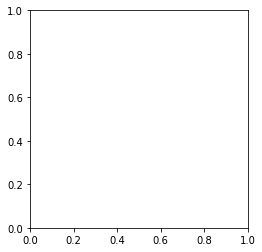